C:\Users\user\AppData\Local\Temp\ipykernel_15588\2170980281.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\2170980281.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\2170980281.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

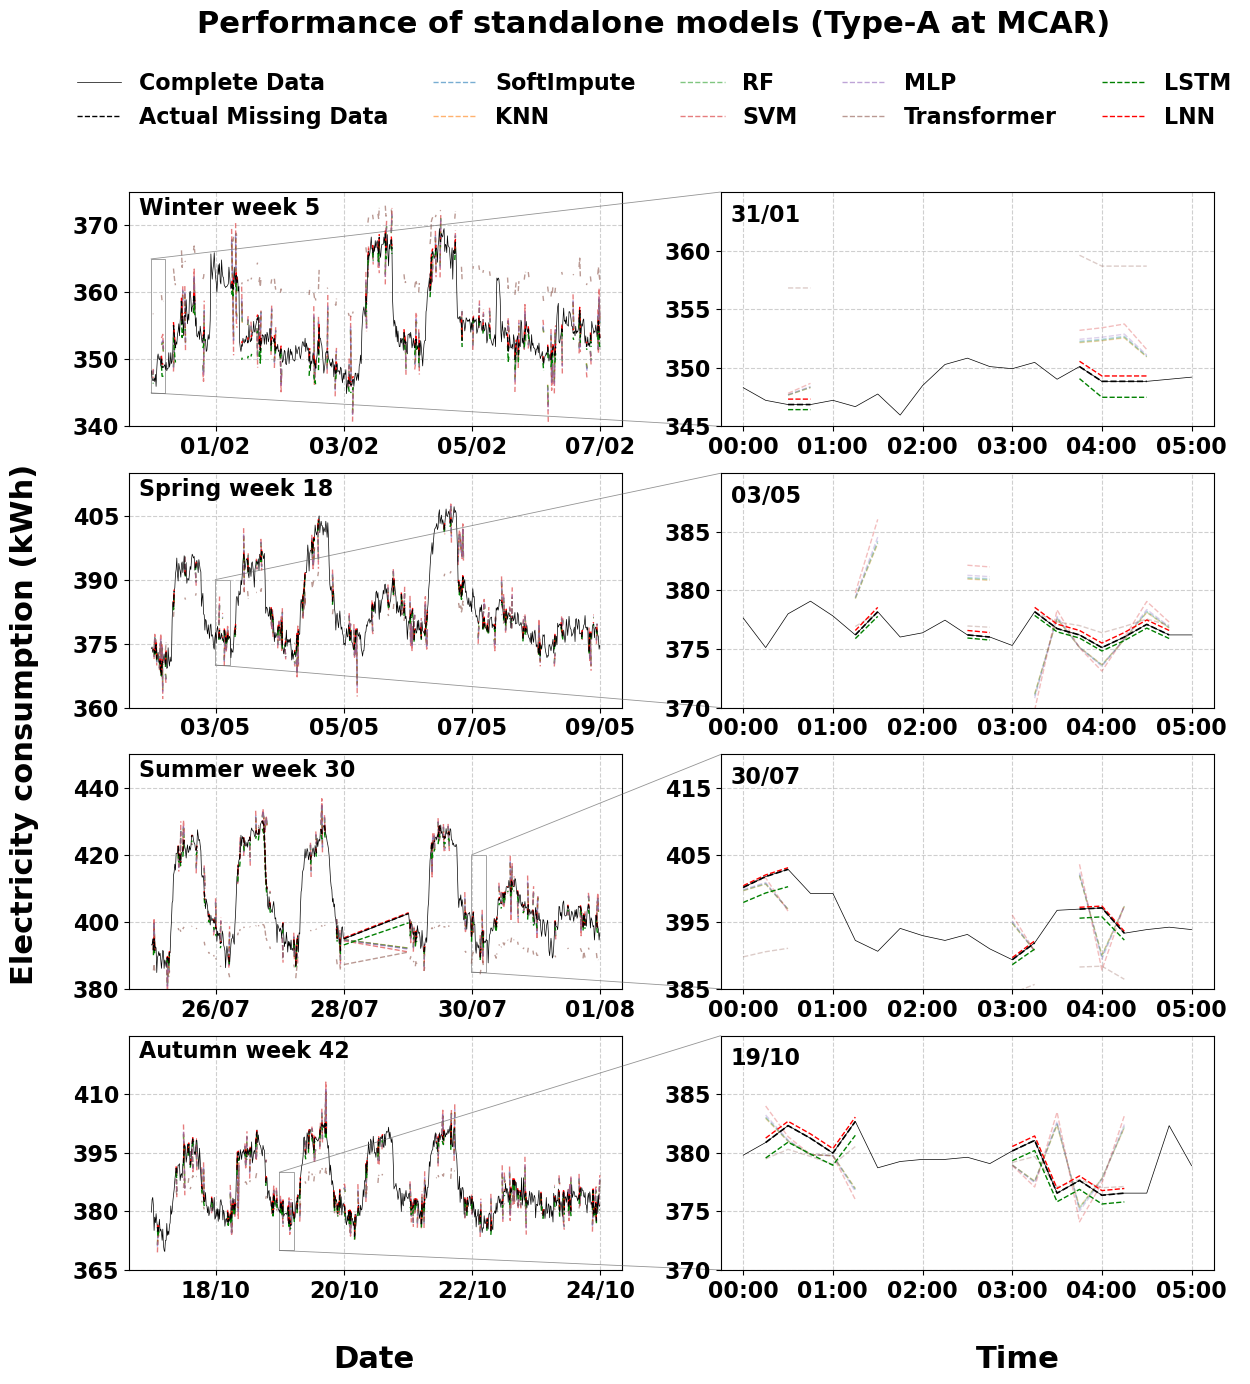

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Mapping for renaming legend labels
rename_dict = {
    'KNNImputer': 'KNN',
    'RFImputer': 'RF',
    'SVMImputer': 'SVM',
    'MLPImputer': 'MLP',
    'LSTM Imputed Data': 'LSTM',
    'LNN Imputed Data': 'LNN'
}

# Load the dataset
file_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\501_a1_mcar.csv"
new_data = pd.read_csv(file_path)

# Convert 'datetime' to a datetime object for better handling
new_data['datetime'] = pd.to_datetime(new_data['datetime'], format='%d/%m/%Y %H:%M')

# Set the datetime as the index for easier resampling and manipulation
new_data.set_index('datetime', inplace=True)

# Extract week numbers and years for easier aggregation
new_data['year'] = new_data.index.year
new_data['week'] = new_data.index.isocalendar().week

# List of background models to plot with transparency
background_models = [
     'SoftImpute', 'KNNImputer', 'RFImputer', 'SVMImputer', 'MLPImputer', 'Transformer'
]

# Define y-axis limits and intervals for each season for weekly and daily plots
y_limits_weekly = {
    'Winter week 5': (340, 375),
    'Spring week 18': (360, 415),
    'Summer week 30': (380, 450),
    'Autumn week 42': (365, 425)
}
y_intervals_weekly = {
    'Winter week 5': 10,
    'Spring week 18': 15,
    'Summer week 30': 20,
    'Autumn week 42': 15
}

y_limits_daily = {
    'Winter week 5': (345, 365),
    'Spring week 18': (370, 390),
    'Summer week 30': (385, 420),
    'Autumn week 42': (370, 390)
}
y_intervals_daily = {
    'Winter week 5': 5,
    'Spring week 18': 5,
    'Summer week 30': 10,
    'Autumn week 42': 5
}

# Define a mapping for each season to plot weekly data and daily data from selected hours (00:00 to 05:00)
season_weeks = {
    'Winter week 5': (2022, 5),
    'Spring week 18': (2022, 18),
    'Summer week 30': (2022, 30),
    'Autumn week 42': (2022, 42)
}

# Parameters to adjust the position and font size of the season labels in the left panel
season_label_params = {
    'x_position': 0.02,  # Horizontal position
    'y_position': 0.98,  # Vertical position
    'font_size': 16      # Font size
}

# Create the figure with 4 rows and 2 columns
fig, axs = plt.subplots(len(season_weeks), 2, figsize=(14, 14), gridspec_kw={'width_ratios': [1, 1]})

# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0.2)  # Reduce space between the right and left panels

for i, (season, (year, week)) in enumerate(season_weeks.items()):
    weekly_ax = axs[i, 0]
    daily_ax = axs[i, 1]

    # Filter the data for the specified week and year
    seasonal_data = new_data[(new_data['year'] == year) & (new_data['week'] == week)]
    seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()

    # Weekly plot (left panel)
    for model in background_models:
        if model in seasonal_data.columns:
            weekly_ax.plot(seasonal_data.index, seasonal_data[model], '--', alpha=0.6, linewidth=1, label=model)

    weekly_ax.plot(seasonal_data.index, seasonal_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='Complete Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN'], '--', color='red', linewidth=1, label='LNN Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['actual data'], '--', color='black', linewidth=1, label='Actual Missing Data')

    weekly_ax.text(season_label_params['x_position'], season_label_params['y_position'], season,
                   transform=weekly_ax.transAxes, fontsize=season_label_params['font_size'], fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    weekly_ax.grid(True, linestyle='--', alpha=0.6)
    weekly_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    weekly_ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.setp(weekly_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(weekly_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_weekly, y_max_weekly = y_limits_weekly[season]
    weekly_ax.set_ylim([y_min_weekly, y_max_weekly])
    weekly_ax.set_yticks(np.arange(y_min_weekly, y_max_weekly, y_intervals_weekly[season]))

    # Daily plot (right panel)
    daily_data = seasonal_data.copy()
    daily_data['day'] = daily_data.index.date
    daily_non_nan_counts = daily_data.groupby('day')['actual data'].apply(lambda x: x.notna().sum())
    selected_day = daily_non_nan_counts.idxmax()

    selected_day_data = seasonal_data[seasonal_data.index.date == selected_day].between_time('00:00', '05:00')
    for model in background_models:
        if model in selected_day_data.columns:
            daily_ax.plot(selected_day_data.index, selected_day_data[model], '--', alpha=0.3, linewidth=1, label=model)

    daily_ax.plot(selected_day_data.index, selected_day_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='ytrue')
    daily_ax.plot(selected_day_data.index, selected_day_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN'], '--', color='red', linewidth=1, label='LNN Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['actual data'], '--', color='black', linewidth=1.2, label='Actual Data')

    # Insert the date inside the daily plot (format: Day-Month)
    daily_ax.text(0.02, 0.95, selected_day.strftime('%d/%m'), transform=daily_ax.transAxes, fontsize=16, fontweight='bold', verticalalignment='top', horizontalalignment='left')
    daily_ax.grid(True, linestyle='--', alpha=0.6)

    daily_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    daily_ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.setp(daily_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(daily_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_daily, y_max_daily = y_limits_daily[season]
    daily_ax.set_ylim([y_min_daily, y_max_daily])
    daily_ax.set_yticks(np.arange(y_min_daily, y_max_daily, y_intervals_daily[season]))

    # Add inset connection lines between weekly and daily plots with shorter length
    mark_inset(weekly_ax, daily_ax, loc1=2, loc2=3, fc="none", ec="0.4", alpha=0.7, lw=0.6)

# Bold shared labels and legend
fig.text(0.04, 0.5, 'Electricity consumption (kWh)', va='center', rotation='vertical', fontsize=22, fontweight='bold')
fig.text(0.3, 0.04, 'Date', ha='center', fontsize=22, fontweight='bold')
fig.text(0.76, 0.04, 'Time', ha='center', fontsize=22, fontweight='bold')

fig.suptitle('Performance of standalone models (Type-A at MCAR)', fontsize=22, fontweight='bold', y=1.01)

# Get the handles and labels from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Define the desired order of labels
desired_order = [
    'Complete Data', 'Actual Missing Data', 'SoftImpute', 'KNNImputer', 'RFImputer',
    'SVMImputer', 'MLPImputer', 'Transformer', 'LSTM Imputed Data', 'LNN Imputed Data'
]

# Create a dictionary of handles and labels
handle_dict = dict(zip(labels, handles))

# Reorder the handles and labels according to the desired order
ordered_handles = [handle_dict[label] for label in desired_order]
ordered_labels = [rename_dict.get(label, label) for label in desired_order]

# Set the legend with the ordered handles and labels
fig.legend(ordered_handles, ordered_labels, loc='upper center', ncol=5, frameon=False, prop={'weight': 'bold', 'size': 16}, bbox_to_anchor=(0.5, 0.98))

plt.tight_layout(rect=[0.07, 0.90, 1, 1])

# Save the plot
output_path_svg = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\type_xa2_mcar_all_models.svg"

plt.savefig(output_path_svg, format='svg', bbox_inches='tight', dpi=300)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15588\184835107.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\184835107.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\184835107.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

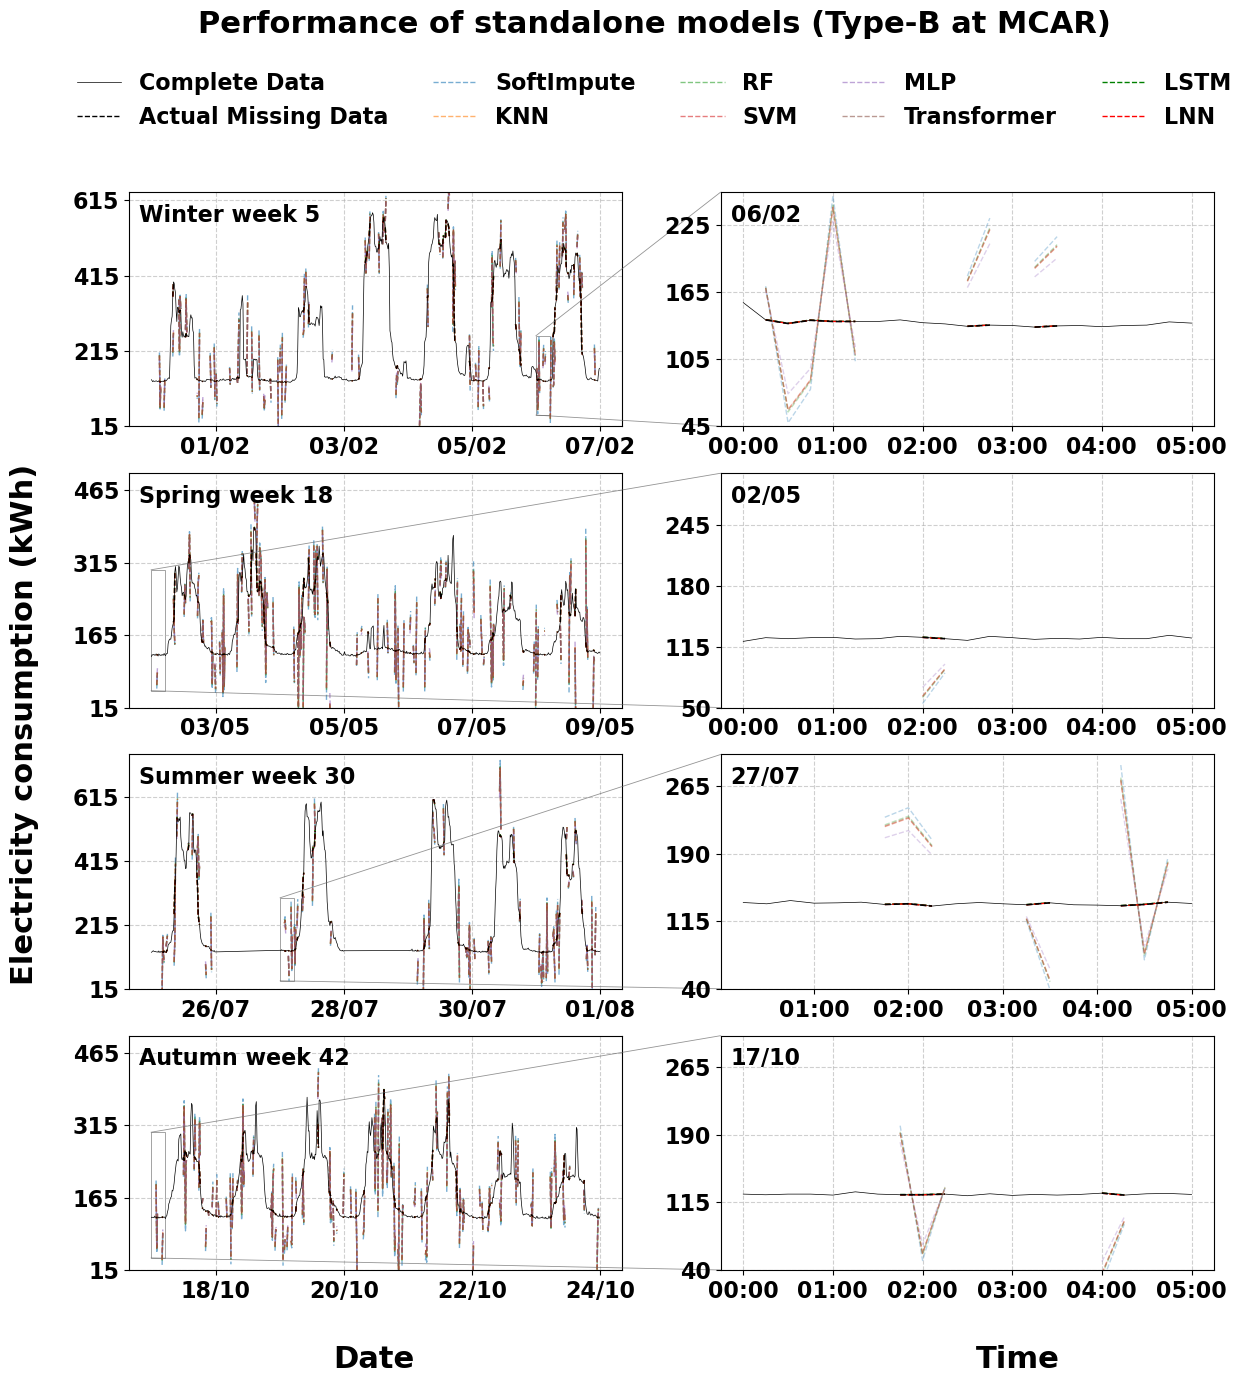

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Mapping for renaming legend labels
rename_dict = {
    'KNNImputer': 'KNN',
    'RFImputer': 'RF',
    'SVMImputer': 'SVM',
    'MLPImputer': 'MLP',
    'LSTM Imputed Data': 'LSTM',
    'LNN Imputed Data': 'LNN'
}

# Load the dataset
file_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\502_b1_mcar.csv"
new_data = pd.read_csv(file_path)

# Convert 'datetime' to a datetime object for better handling
new_data['datetime'] = pd.to_datetime(new_data['datetime'], format='%d/%m/%Y %H:%M')
new_data.set_index('datetime', inplace=True)

# Extract week numbers and years for easier aggregation
new_data['year'] = new_data.index.year
new_data['week'] = new_data.index.isocalendar().week

# List of background models to plot with transparency
background_models = [
    'SoftImpute', 'KNNImputer', 'RFImputer', 'SVMImputer', 'MLPImputer', 'Transformer'
]

# Define y-axis limits and intervals for each season for weekly and daily plots
y_limits_weekly = {
    'Winter week 5': (15, 637.5),
    'Spring week 18': (15, 500),
    'Summer week 30': (15, 750),
    'Autumn week 42': (15, 500)
}
y_intervals_weekly = {
    'Winter week 5': 200,
    'Spring week 18': 150,
    'Summer week 30': 200,
    'Autumn week 42': 150
}

y_limits_daily = {
    'Winter week 5': (45, 255),
    'Spring week 18': (50, 300),
    'Summer week 30': (40, 300),
    'Autumn week 42': (40, 300)
}
y_intervals_daily = {
    'Winter week 5': 60,
    'Spring week 18': 65,
    'Summer week 30': 75,
    'Autumn week 42': 75
}

# Define specific dates for the daily plots in each season
daily_dates = {
    'Winter week 5': None,  # Use the day with the most data
    'Spring week 18': '2022-05-02',
    'Summer week 30': '2022-07-27',
    'Autumn week 42': '2022-10-17'
}

# Define a mapping for each season to plot weekly data and daily data from selected hours (00:00 to 05:00)
season_weeks = {
    'Winter week 5': (2022, 5),
    'Spring week 18': (2022, 18),
    'Summer week 30': (2022, 30),
    'Autumn week 42': (2022, 42)
}

# Create the figure with 4 rows and 2 columns
fig, axs = plt.subplots(len(season_weeks), 2, figsize=(14, 14), gridspec_kw={'width_ratios': [1, 1]})

# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0.2)

for i, (season, (year, week)) in enumerate(season_weeks.items()):
    weekly_ax = axs[i, 0]
    daily_ax = axs[i, 1]

    # Filter the data for the specified week and year
    seasonal_data = new_data[(new_data['year'] == year) & (new_data['week'] == week)]
    seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()

    # Weekly plot (left panel)
    for model in background_models:
        if model in seasonal_data.columns:
            weekly_ax.plot(seasonal_data.index, seasonal_data[model], '--', alpha=0.6, linewidth=1, label=model)

    weekly_ax.plot(seasonal_data.index, seasonal_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='Complete Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN'], '--', color='red', linewidth=1, label='LNN Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['actual data'], '--', color='black', linewidth=1, label='Actual Missing Data')

    weekly_ax.text(0.02, 0.95, season, transform=weekly_ax.transAxes, fontsize=16, fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    weekly_ax.grid(True, linestyle='--', alpha=0.6)
    weekly_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    weekly_ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.setp(weekly_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(weekly_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_weekly, y_max_weekly = y_limits_weekly[season]
    weekly_ax.set_ylim([y_min_weekly, y_max_weekly])
    weekly_ax.set_yticks(np.arange(y_min_weekly, y_max_weekly, y_intervals_weekly[season]))

    # Daily plot (right panel)
    if daily_dates[season]:
        selected_day_data = seasonal_data[seasonal_data.index.date == pd.to_datetime(daily_dates[season]).date()].between_time('00:00', '05:00')
        selected_day = daily_dates[season]
    else:
        daily_data = seasonal_data.copy()
        daily_data['day'] = daily_data.index.date
        daily_non_nan_counts = daily_data.groupby('day')['actual data'].apply(lambda x: x.notna().sum())
        selected_day = daily_non_nan_counts.idxmax()
        selected_day_data = seasonal_data[seasonal_data.index.date == selected_day].between_time('00:00', '05:00')

    for model in background_models:
        if model in selected_day_data.columns:
            daily_ax.plot(selected_day_data.index, selected_day_data[model], '--', alpha=0.3, linewidth=1, label=model)

    daily_ax.plot(selected_day_data.index, selected_day_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='ytrue')
    daily_ax.plot(selected_day_data.index, selected_day_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN'], '--', color='red', linewidth=1, label='LNN Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['actual data'], '--', color='black', linewidth=1.2, label='Actual Data')

    formatted_date = pd.Timestamp(selected_day).strftime('%d/%m')
    daily_ax.text(0.02, 0.95, formatted_date, transform=daily_ax.transAxes, fontsize=16, fontweight='bold', verticalalignment='top', horizontalalignment='left')

    daily_ax.grid(True, linestyle='--', alpha=0.6)
    daily_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    daily_ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.setp(daily_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(daily_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_daily, y_max_daily = y_limits_daily[season]
    daily_ax.set_ylim([y_min_daily, y_max_daily])
    daily_ax.set_yticks(np.arange(y_min_daily, y_max_daily, y_intervals_daily[season]))

    mark_inset(weekly_ax, daily_ax, loc1=2, loc2=3, fc="none", ec="0.4", alpha=0.7, lw=0.6)

# Bold shared labels and legend
fig.text(0.04, 0.5, 'Electricity consumption (kWh)', va='center', rotation='vertical', fontsize=22, fontweight='bold')
fig.text(0.3, 0.04, 'Date', ha='center', fontsize=22, fontweight='bold')
fig.text(0.76, 0.04, 'Time', ha='center', fontsize=22, fontweight='bold')

fig.suptitle('Performance of standalone models (Type-B at MCAR)', fontsize=22, fontweight='bold', y=1.01)

# Get the handles and labels from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Define the desired order of labels
desired_order = [
    'Complete Data', 'Actual Missing Data', 'SoftImpute', 'KNNImputer', 'RFImputer',
    'SVMImputer', 'MLPImputer', 'Transformer', 'LSTM Imputed Data', 'LNN Imputed Data'
]

# Create a dictionary of handles and labels
handle_dict = dict(zip(labels, handles))

# Reorder the handles and labels according to the desired order
ordered_handles = [handle_dict[label] for label in desired_order]
ordered_labels = [rename_dict.get(label, label) for label in desired_order]

# Set the legend with the ordered handles and labels
fig.legend(ordered_handles, ordered_labels, loc='upper center', ncol=5, frameon=False, prop={'weight': 'bold', 'size': 16}, bbox_to_anchor=(0.5, 0.98))

plt.tight_layout(rect=[0.07, 0.90, 1, 1])

# Save the plot
output_path_svg = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\type_xb2_mcar_all_models.svg"

plt.savefig(output_path_svg, format='svg', bbox_inches='tight', dpi=300)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15588\1924116031.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\1924116031.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\1924116031.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

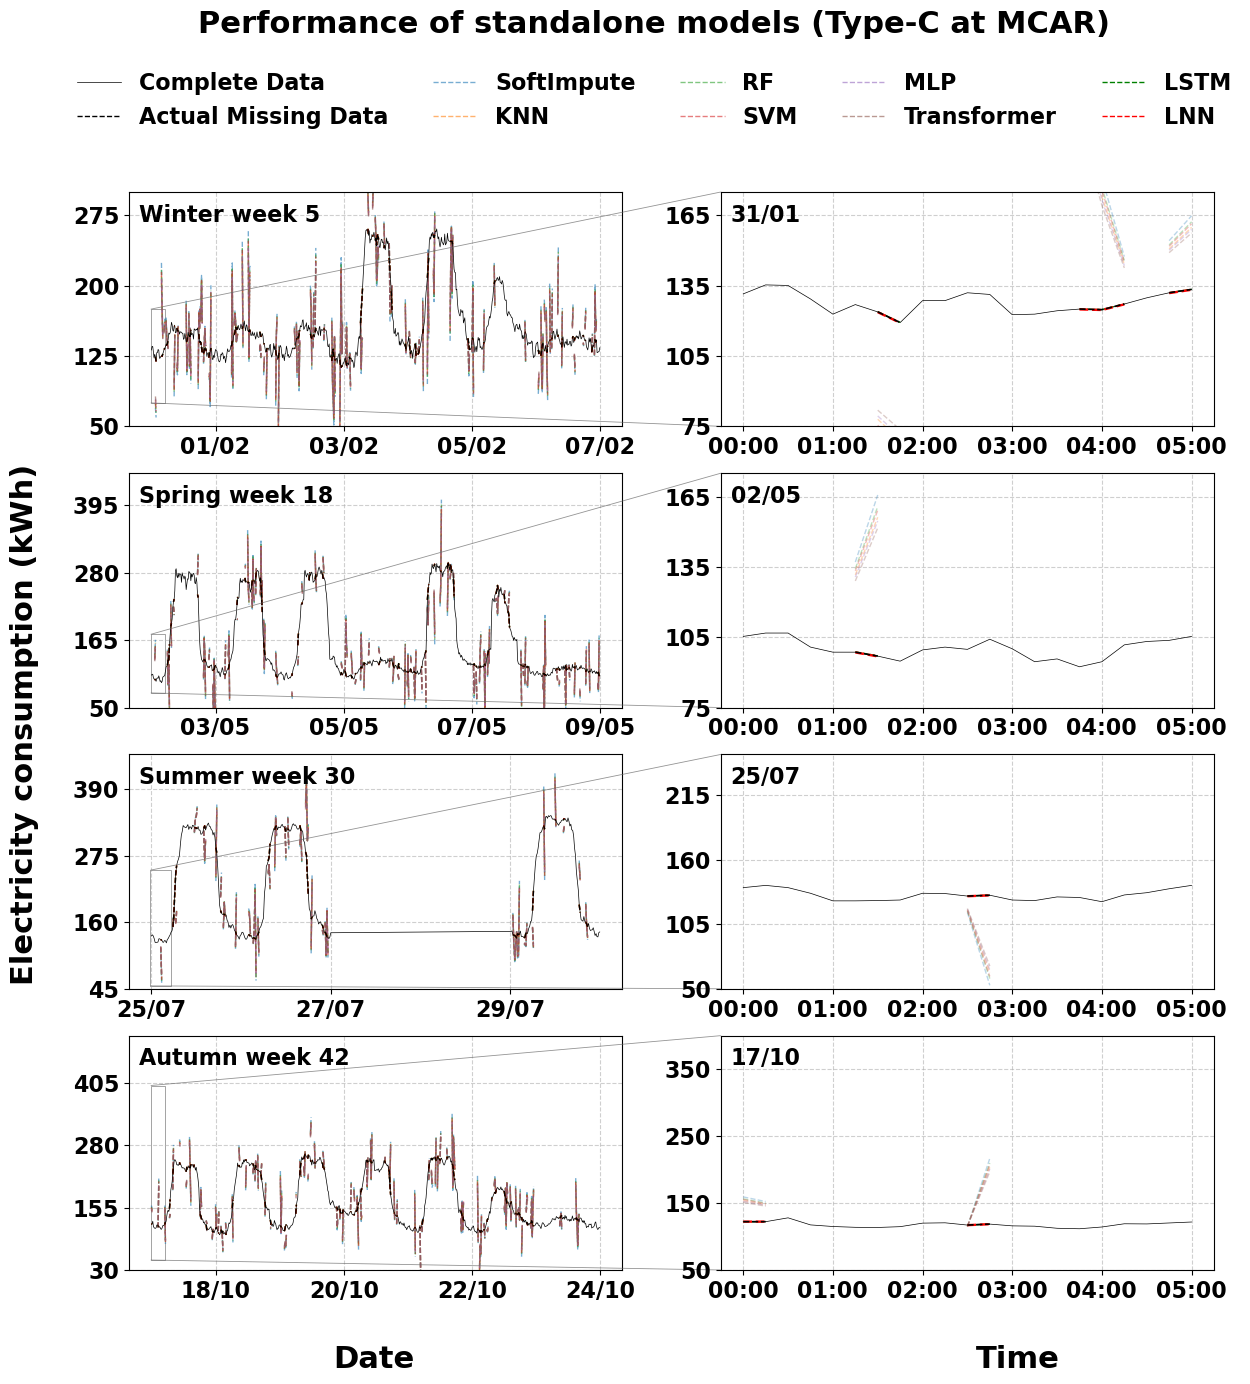

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Mapping for renaming legend labels
rename_dict = {
    'KNNImputer': 'KNN',
    'RFImputer': 'RF',
    'SVMImputer': 'SVM',
    'MLPImputer': 'MLP',
    'LSTM Imputed Data': 'LSTM',
    'LNN Imputed Data': 'LNN'
}

# Load the dataset
file_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\505_c1_mcar.csv"
new_data = pd.read_csv(file_path)

# Convert 'datetime' to a datetime object for better handling
new_data['datetime'] = pd.to_datetime(new_data['datetime'], format='%d/%m/%Y %H:%M')
new_data.set_index('datetime', inplace=True)

# Extract week numbers and years for easier aggregation
new_data['year'] = new_data.index.year
new_data['week'] = new_data.index.isocalendar().week

# Define y-axis limits and intervals for each season for weekly and daily plots
y_limits_weekly = {
    'Winter week 5': (50, 300),
    'Spring week 18': (50, 450),
    'Summer week 30': (45, 450),
    'Autumn week 42': (30, 500)
}
y_intervals_weekly = {
    'Winter week 5': 75,
    'Spring week 18': 115,
    'Summer week 30': 115,
    'Autumn week 42': 125
}
y_limits_daily = {
    'Winter week 5': (75, 175),
    'Spring week 18': (75, 175),
    'Summer week 30': (50, 250),
    'Autumn week 42': (50, 400)
}
y_intervals_daily = {
    'Winter week 5': 30,
    'Spring week 18': 30,
    'Summer week 30': 55,
    'Autumn week 42': 100
}

# Define specific dates for the daily plots
daily_dates = {
    'Winter week 5': '2022-01-31',
    'Spring week 18': '2022-05-02',
    'Summer week 30': '2022-07-25',
    'Autumn week 42': '2022-10-17'
}

# Define a mapping for each season to plot weekly data and daily data from selected hours
season_weeks = {
    'Winter week 5': (2022, 5),
    'Spring week 18': (2022, 18),
    'Summer week 30': (2022, 30),
    'Autumn week 42': (2022, 42)
}

# List of background models
background_models = [
    'SoftImpute', 'KNNImputer', 'RFImputer', 'SVMImputer', 'MLPImputer', 'Transformer'
]

# Create the figure with 4 rows and 2 columns
fig, axs = plt.subplots(len(season_weeks), 2, figsize=(14, 14), gridspec_kw={'width_ratios': [1, 1]})

# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0.2)

for i, (season, (year, week)) in enumerate(season_weeks.items()):
    weekly_ax = axs[i, 0]
    daily_ax = axs[i, 1]

    # Filter the data for the specified week and year
    seasonal_data = new_data[(new_data['year'] == year) & (new_data['week'] == week)]
    seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()

    # Weekly plot
    for model in background_models:
        if model in seasonal_data.columns:
            weekly_ax.plot(seasonal_data.index, seasonal_data[model], '--', alpha=0.6, linewidth=1, label=model)

    weekly_ax.plot(seasonal_data.index, seasonal_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='Complete Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN'], '--', color='red', linewidth=1, label='LNN Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['actual data'], '--', color='black', linewidth=1, label='Actual Missing Data')

    weekly_ax.text(0.02, 0.95, season, transform=weekly_ax.transAxes, fontsize=16, fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    weekly_ax.grid(True, linestyle='--', alpha=0.6)
    weekly_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    weekly_ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.setp(weekly_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(weekly_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_weekly, y_max_weekly = y_limits_weekly[season]
    weekly_ax.set_ylim([y_min_weekly, y_max_weekly])
    weekly_ax.set_yticks(np.arange(y_min_weekly, y_max_weekly, y_intervals_weekly[season]))

    # Daily plot with specified time range and date
    selected_date = pd.to_datetime(daily_dates[season])
    selected_day_data = seasonal_data[seasonal_data.index.date == selected_date.date()].between_time('00:00', '05:00')

    for model in background_models:
        if model in selected_day_data.columns:
            daily_ax.plot(selected_day_data.index, selected_day_data[model], '--', alpha=0.3, linewidth=1, label=model)

    daily_ax.plot(selected_day_data.index, selected_day_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='ytrue')
    daily_ax.plot(selected_day_data.index, selected_day_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN'], '--', color='red', linewidth=1.7, label='LNN Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['actual data'], '--', color='black', linewidth=1.2, label='Actual Data')

    daily_ax.text(0.02, 0.95, selected_date.strftime('%d/%m'), transform=daily_ax.transAxes, fontsize=16, fontweight='bold',
                  verticalalignment='top', horizontalalignment='left')

    daily_ax.grid(True, linestyle='--', alpha=0.6)
    daily_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    daily_ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.setp(daily_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(daily_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_daily, y_max_daily = y_limits_daily[season]
    daily_ax.set_ylim([y_min_daily, y_max_daily])
    daily_ax.set_yticks(np.arange(y_min_daily, y_max_daily, y_intervals_daily[season]))

    # Add inset connection lines
    mark_inset(weekly_ax, daily_ax, loc1=2, loc2=3, fc="none", ec="0.4", alpha=0.7, lw=0.6)

# Bold shared labels and legend
fig.text(0.04, 0.5, 'Electricity consumption (kWh)', va='center', rotation='vertical', fontsize=22, fontweight='bold')
fig.text(0.3, 0.04, 'Date', ha='center', fontsize=22, fontweight='bold')
fig.text(0.76, 0.04, 'Time', ha='center', fontsize=22, fontweight='bold')

fig.suptitle('Performance of standalone models (Type-C at MCAR)', fontsize=22, fontweight='bold', y=1.01)

# Get the handles and labels from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Define the desired order of labels
desired_order = [
    'Complete Data', 'Actual Missing Data', 'SoftImpute', 'KNNImputer', 'RFImputer',
    'SVMImputer', 'MLPImputer', 'Transformer', 'LSTM Imputed Data', 'LNN Imputed Data'
]

# Create a dictionary of handles and labels
handle_dict = dict(zip(labels, handles))

# Reorder the handles and labels according to the desired order
ordered_handles = [handle_dict[label] for label in desired_order]
ordered_labels = [rename_dict.get(label, label) for label in desired_order]

# Set the legend with the ordered handles and labels
fig.legend(ordered_handles, ordered_labels, loc='upper center', ncol=5, frameon=False, prop={'weight': 'bold', 'size': 16}, bbox_to_anchor=(0.5, 0.98))

plt.tight_layout(rect=[0.07, 0.90, 1, 1])

# Save the plot
output_path_svg = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\type_xC2_mcar_all_models.svg"

plt.savefig(output_path_svg, format='svg', bbox_inches='tight', dpi=300)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15588\216599028.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\216599028.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\216599028.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

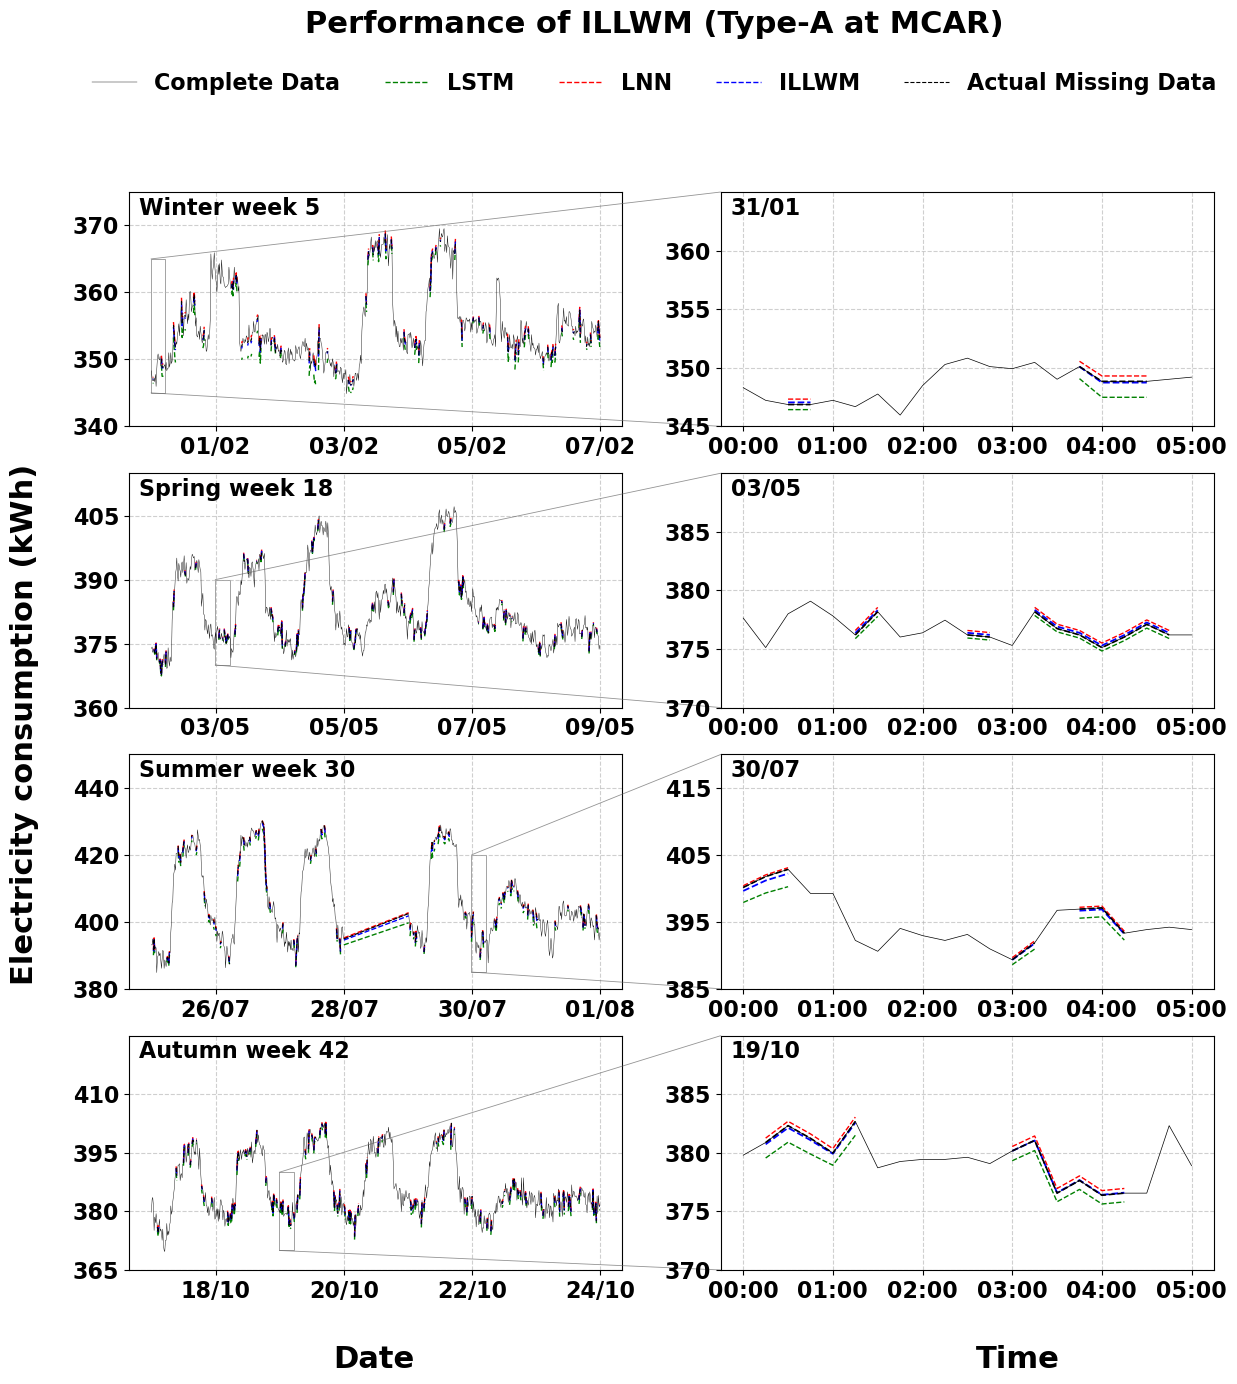

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Mapping for renaming legend labels
rename_dict = {
    'LNN Imputed Data': 'LNN',
    'LSTM Imputed Data': 'LSTM',
    'Integrated LNN-LSTM weighted model': 'ILLWM'
}

# Load the dataset
file_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\501_a1_mcar.csv"
new_data = pd.read_csv(file_path)

# Convert 'datetime' to a datetime object for better handling
new_data['datetime'] = pd.to_datetime(new_data['datetime'], format='%d/%m/%Y %H:%M')
new_data.set_index('datetime', inplace=True)

# Extract week numbers and years for easier aggregation
new_data['year'] = new_data.index.year
new_data['week'] = new_data.index.isocalendar().week

# Define y-axis limits and intervals for each season for weekly and daily plots
y_limits_weekly = {
    'Winter week 5': (340, 375),
    'Spring week 18': (360, 415),
    'Summer week 30': (380, 450),
    'Autumn week 42': (365, 425)
}
y_intervals_weekly = {
    'Winter week 5': 10,
    'Spring week 18': 15,
    'Summer week 30': 20,
    'Autumn week 42': 15
}

y_limits_daily = {
    'Winter week 5': (345, 365),
    'Spring week 18': (370, 390),
    'Summer week 30': (385, 420),
    'Autumn week 42': (370, 390)
}
y_intervals_daily = {
    'Winter week 5': 5,
    'Spring week 18': 5,
    'Summer week 30': 10,
    'Autumn week 42': 5
}

# Define a mapping for each season to plot weekly data and daily data from selected hours (00:00 to 05:00)
season_weeks = {
    'Winter week 5': (2022, 5),
    'Spring week 18': (2022, 18),
    'Summer week 30': (2022, 30),
    'Autumn week 42': (2022, 42)
}

# Parameters to adjust the position and font size of the season labels in the left panel
season_label_params = {
    'x_position': 0.02,  # Horizontal position
    'y_position': 0.98,  # Vertical position
    'font_size': 16      # Font size
}

# Create the figure with 4 rows and 2 columns
fig, axs = plt.subplots(len(season_weeks), 2, figsize=(14, 14), gridspec_kw={'width_ratios': [1, 1]})

# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0.2)

for i, (season, (year, week)) in enumerate(season_weeks.items()):
    weekly_ax = axs[i, 0]
    daily_ax = axs[i, 1]

    # Filter the data for the specified week and year
    seasonal_data = new_data[(new_data['year'] == year) & (new_data['week'] == week)]

    # Interpolate missing values for 'ytrue'
    seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()

    # Weekly plot (left panel)
    weekly_ax.plot(seasonal_data.index, seasonal_data['ytrue_interpolated'], '-', color='black', linewidth=0.3, label='Complete Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN'], '--', color='red', linewidth=1, label='LNN Imputed Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN-LSTM weighted'], '--', color='blue', linewidth=1, label='Integrated LNN-LSTM weighted model')
    weekly_ax.plot(seasonal_data.index, seasonal_data['actual data'], '--', color='black', linewidth=0.8, label='Actual Missing Data')

    weekly_ax.text(season_label_params['x_position'], season_label_params['y_position'], season,
                   transform=weekly_ax.transAxes, fontsize=season_label_params['font_size'], fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    weekly_ax.grid(True, linestyle='--', alpha=0.6)
    weekly_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    weekly_ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.setp(weekly_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(weekly_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_weekly, y_max_weekly = y_limits_weekly[season]
    weekly_ax.set_ylim([y_min_weekly, y_max_weekly])
    weekly_ax.set_yticks(np.arange(y_min_weekly, y_max_weekly, y_intervals_weekly[season]))

    # Daily plot (right panel)
    daily_data = seasonal_data.copy()
    daily_data['day'] = daily_data.index.date
    daily_non_nan_counts = daily_data.groupby('day')['actual data'].apply(lambda x: x.notna().sum())
    selected_day = daily_non_nan_counts.idxmax()

    selected_day_data = seasonal_data[seasonal_data.index.date == selected_day].between_time('00:00', '05:00')
    daily_ax.plot(selected_day_data.index, selected_day_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='ytrue')
    daily_ax.plot(selected_day_data.index, selected_day_data['LSTM'], '--', color='green', linewidth=1, label='LSTM Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN'], '--', color='red', linewidth=1, label='LNN Imputed Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN-LSTM weighted'], '--', color='blue', linewidth=1.3, label='Integrated LNN-LSTM weighted model')
    daily_ax.plot(selected_day_data.index, selected_day_data['actual data'], '--', color='black', linewidth=1.2, label='Actual Data')

    # Display only day and month in the date label
    daily_ax.text(0.02, 0.98, selected_day.strftime('%d/%m'), transform=daily_ax.transAxes, fontsize=16, fontweight='bold',
                  verticalalignment='top', horizontalalignment='left')
    daily_ax.grid(True, linestyle='--', alpha=0.6)
    daily_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    daily_ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.setp(daily_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(daily_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_daily, y_max_daily = y_limits_daily[season]
    daily_ax.set_ylim([y_min_daily, y_max_daily])
    daily_ax.set_yticks(np.arange(y_min_daily, y_max_daily, y_intervals_daily[season]))

    # Add inset connection lines
    mark_inset(weekly_ax, daily_ax, loc1=2, loc2=3, fc="none", ec="0.4", alpha=0.7, lw=0.6)

# Common y-axis label
fig.text(0.04, 0.5, 'Electricity consumption (kWh)', va='center', rotation='vertical', fontsize=22, fontweight='bold')
fig.text(0.3, 0.04, 'Date', ha='center', fontsize=22, fontweight='bold')
fig.text(0.76, 0.04, 'Time', ha='center', fontsize=22, fontweight='bold')

fig.suptitle('Performance of ILLWM (Type-A at MCAR)', fontsize=22, fontweight='bold', y=1.01)

handles, labels = axs[0, 0].get_legend_handles_labels()

# Reorder the handles and labels according to the desired order
ordered_labels = [rename_dict.get(label, label) for label in labels]
fig.legend(handles, ordered_labels, loc='upper center', ncol=5, frameon=False, prop={'weight': 'bold', 'size': 16}, bbox_to_anchor=(0.5, 0.98))

plt.tight_layout(rect=[0.07, 0.90, 1, 1])

# Save the plot
output_path_svg = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\type_xa1_mcar.svg"

plt.savefig(output_path_svg, format='svg', bbox_inches='tight', dpi=300)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15588\3373175624.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\3373175624.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\3373175624.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

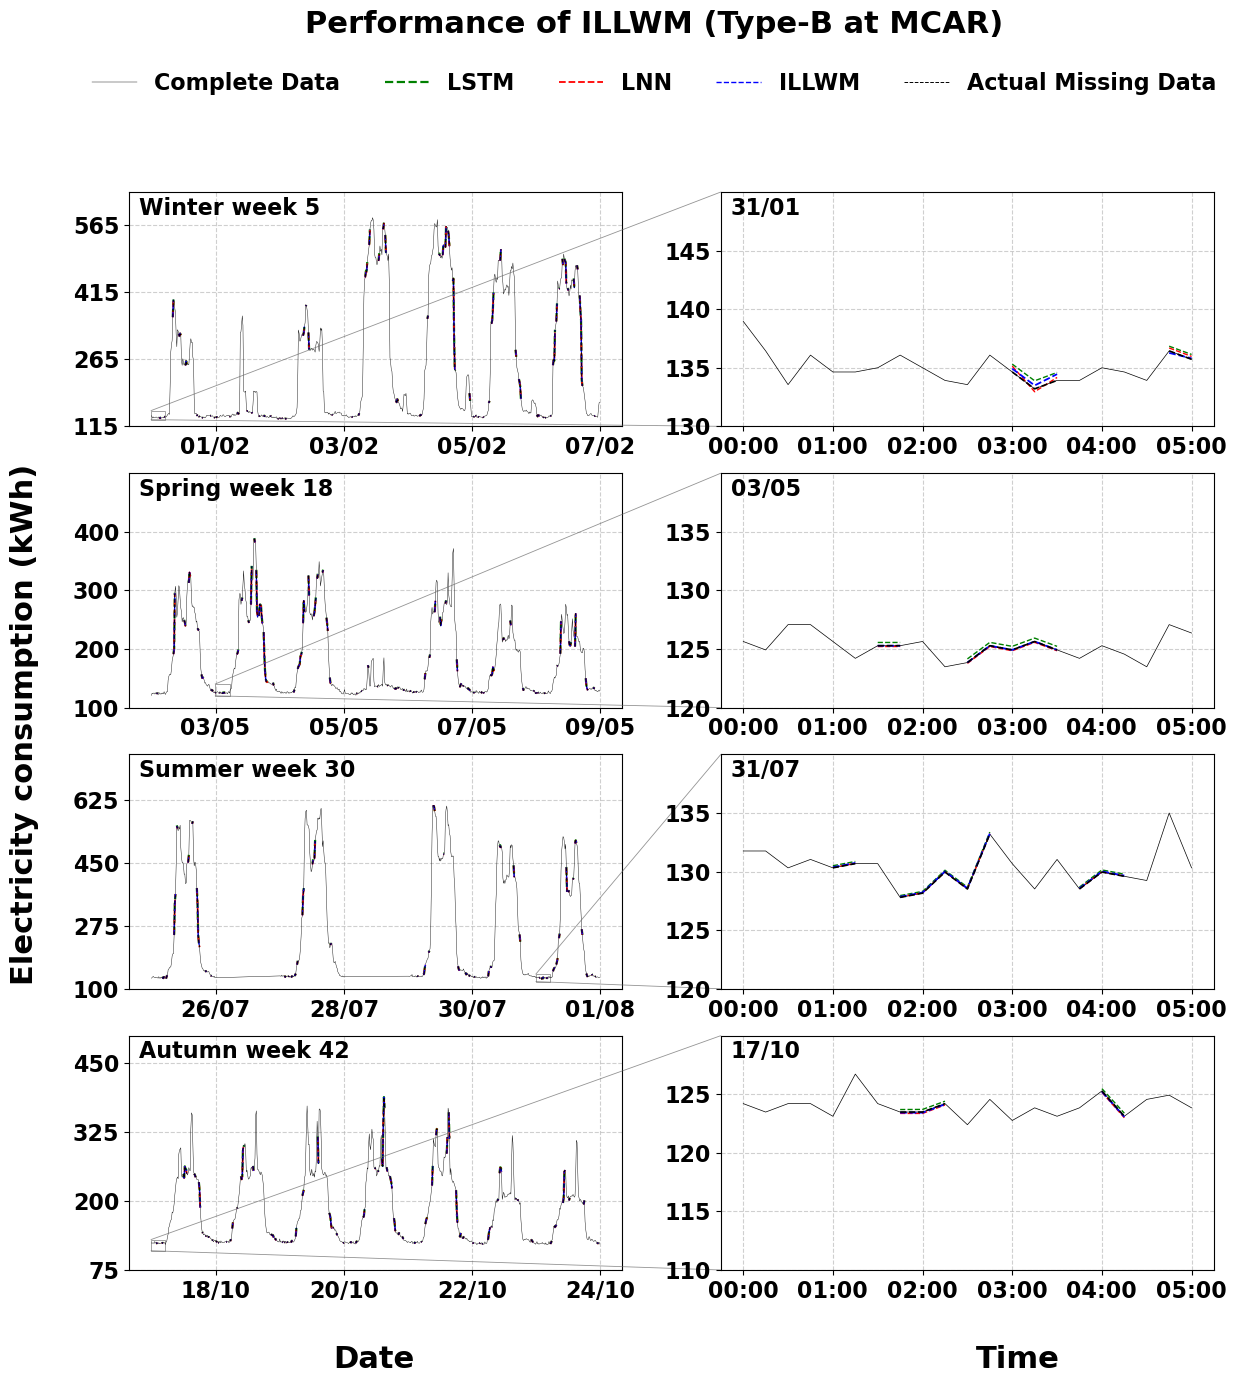

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Load the dataset
file_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\502_b1_mcar.csv"
new_data = pd.read_csv(file_path)

# Convert 'datetime' to a datetime object for better handling
new_data['datetime'] = pd.to_datetime(new_data['datetime'], format='%d/%m/%Y %H:%M')
new_data.set_index('datetime', inplace=True)

# Extract week numbers and years for easier aggregation
new_data['year'] = new_data.index.year
new_data['week'] = new_data.index.isocalendar().week

# Define y-axis limits and intervals for each season for weekly and daily plots
y_limits_weekly = {
    'Winter week 5': (115, 640),
    'Spring week 18': (100, 500),
    'Summer week 30': (100, 750),
    'Autumn week 42': (75, 500)
}
y_intervals_weekly = {
    'Winter week 5': 150,
    'Spring week 18': 100,
    'Summer week 30': 175,
    'Autumn week 42': 125
}
y_limits_daily = {
    'Winter week 5': (130, 150),
    'Spring week 18': (120, 140),
    'Summer week 30': (120, 140),
    'Autumn week 42': (110, 130)
}
y_intervals_daily = {
    'Winter week 5': 5,
    'Spring week 18': 5,
    'Summer week 30': 5,
    'Autumn week 42': 5
}

# Define specific dates for the daily plots in each season
custom_dates = {
    'Winter week 5': '2022-01-31',
    'Spring week 18': '2022-05-03',
    'Summer week 30': '2022-07-31',
    'Autumn week 42': '2022-10-17'
}

# Define a mapping for each season to plot weekly data and daily data from selected hours (00:00 to 05:00)
season_weeks = {
    'Winter week 5': (2022, 5),
    'Spring week 18': (2022, 18),
    'Summer week 30': (2022, 30),
    'Autumn week 42': (2022, 42)
}

# Parameters to adjust the position and font size of the season labels in the left panel
season_label_params = {
    'x_position': 0.02,
    'y_position': 0.98,
    'font_size': 16
}

# Create the figure with 4 rows and 2 columns
fig, axs = plt.subplots(len(season_weeks), 2, figsize=(14, 14), gridspec_kw={'width_ratios': [1, 1]})

# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0.2)

for i, (season, (year, week)) in enumerate(season_weeks.items()):
    weekly_ax = axs[i, 0]
    daily_ax = axs[i, 1]

    # Filter the data for the specified week and year
    seasonal_data = new_data[(new_data['year'] == year) & (new_data['week'] == week)]
    seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()

    # Weekly plot (left panel)
    weekly_ax.plot(seasonal_data.index, seasonal_data['ytrue_interpolated'], '-', color='black', linewidth=0.3, label='Complete Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LSTM'], '--', color='green', linewidth=1.6, label='LSTM')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN'], '--', color='red', linewidth=1.3, label='LNN')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN-LSTM weighted'], '--', color='blue', linewidth=1, label='ILLWM')
    weekly_ax.plot(seasonal_data.index, seasonal_data['actual data'], '--', color='black', linewidth=0.7, label='Actual Missing Data')

    weekly_ax.text(season_label_params['x_position'], season_label_params['y_position'], season,
                   transform=weekly_ax.transAxes, fontsize=season_label_params['font_size'], fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    weekly_ax.grid(True, linestyle='--', alpha=0.6)
    weekly_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    weekly_ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.setp(weekly_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(weekly_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_weekly, y_max_weekly = y_limits_weekly[season]
    weekly_ax.set_ylim([y_min_weekly, y_max_weekly])
    weekly_ax.set_yticks(np.arange(y_min_weekly, y_max_weekly, y_intervals_weekly[season]))

    # Daily plot (right panel)
    selected_day_data = seasonal_data[seasonal_data.index.date == pd.Timestamp(custom_dates[season]).date()].between_time('00:00', '05:00')

    daily_ax.plot(selected_day_data.index, selected_day_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='Complete Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['LSTM'], '--', color='green', linewidth=1, label='LSTM')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN'], '--', color='red', linewidth=1, label='LNN')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN-LSTM weighted'], '--', color='blue', linewidth=1.3, label='ILLWM')
    daily_ax.plot(selected_day_data.index, selected_day_data['actual data'], '--', color='black', linewidth=1.2, label='Actual Missing Data')

    # Display only Day-Month inside the daily plot
    date_text = pd.Timestamp(custom_dates[season]).strftime('%d/%m')
    daily_ax.text(0.02, 0.98, date_text, transform=daily_ax.transAxes, fontsize=16, fontweight='bold',
                  verticalalignment='top', horizontalalignment='left')
    daily_ax.grid(True, linestyle='--', alpha=0.6)
    daily_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    daily_ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.setp(daily_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(daily_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_daily, y_max_daily = y_limits_daily[season]
    daily_ax.set_ylim([y_min_daily, y_max_daily])
    daily_ax.set_yticks(np.arange(y_min_daily, y_max_daily, y_intervals_daily[season]))

    # Add inset connection lines
    mark_inset(weekly_ax, daily_ax, loc1=2, loc2=3, fc="none", ec="0.4", alpha=0.7, lw=0.6)

# Common y-axis label
fig.text(0.04, 0.5, 'Electricity consumption (kWh)', va='center', rotation='vertical', fontsize=22, fontweight='bold')
fig.text(0.3, 0.04, 'Date', ha='center', fontsize=22, fontweight='bold')
fig.text(0.76, 0.04, 'Time', ha='center', fontsize=22, fontweight='bold')

# Add a suptitle for the entire figure
fig.suptitle('Performance of ILLWM (Type-B at MCAR)', fontsize=22, fontweight='bold', y=1.01)

# Unified legend for all plots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, frameon=False, prop={'weight': 'bold', 'size': 16}, bbox_to_anchor=(0.5, 0.98))

# Adjust layout to prevent overlap and allow room for legends
plt.tight_layout(rect=[0.07, 0.90, 1, 1])

# Save the plot
output_path_svg = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\type_xb1_mcar.svg"

plt.savefig(output_path_svg, format='svg', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15588\712516352.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\712516352.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()
C:\Users\user\AppData\Local\Temp\ipykernel_15588\712516352.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

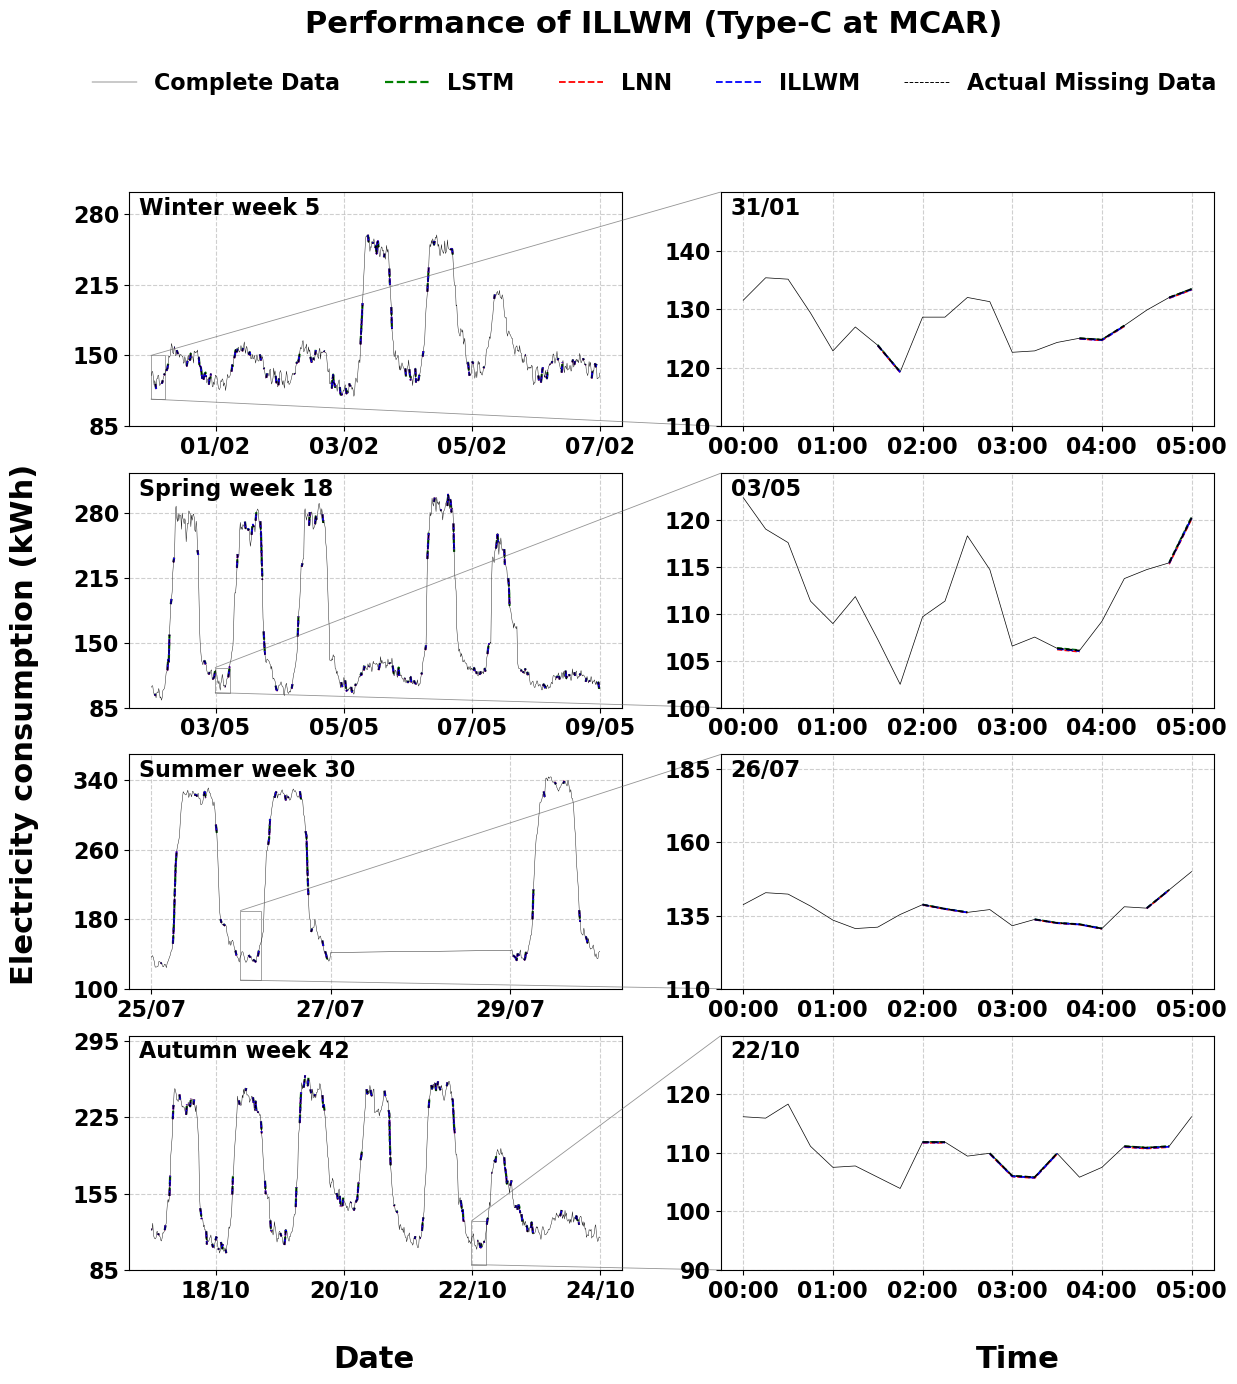

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Load the dataset
file_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\505_c1_mcar.csv"
new_data = pd.read_csv(file_path)

# Convert 'datetime' to a datetime object for better handling
new_data['datetime'] = pd.to_datetime(new_data['datetime'], format='%d/%m/%Y %H:%M')
new_data.set_index('datetime', inplace=True)

# Extract week numbers and years for easier aggregation
new_data['year'] = new_data.index.year
new_data['week'] = new_data.index.isocalendar().week

# Define y-axis limits and intervals for each season for weekly and daily plots
y_limits_weekly = {
    'Winter week 5': (85, 300),
    'Spring week 18': (85, 320),
    'Summer week 30': (100, 370),
    'Autumn week 42': (85, 300)
}
y_intervals_weekly = {
    'Winter week 5': 65,
    'Spring week 18': 65,
    'Summer week 30': 80,
    'Autumn week 42': 70
}

y_limits_daily = {
    'Winter week 5': (110, 150),
    'Spring week 18': (100, 125),
    'Summer week 30': (110, 190),
    'Autumn week 42': (90, 130)
}
y_intervals_daily = {
    'Winter week 5': 10,
    'Spring week 18': 5,
    'Summer week 30': 25,
    'Autumn week 42': 10
}

# Define a mapping for each season to plot weekly data and daily data from selected hours (00:00 to 05:00)
season_weeks = {
    'Winter week 5': (2022, 5),
    'Spring week 18': (2022, 18),
    'Summer week 30': (2022, 30),
    'Autumn week 42': (2022, 42)
}

# Parameters to adjust the position and font size of the season labels in the left panel
season_label_params = {
    'x_position': 0.02,  # Horizontal position
    'y_position': 0.98,  # Vertical position
    'font_size': 16      # Font size
}

# Create the figure with 4 rows and 2 columns
fig, axs = plt.subplots(len(season_weeks), 2, figsize=(14, 14), gridspec_kw={'width_ratios': [1, 1]})

# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0.2)

for i, (season, (year, week)) in enumerate(season_weeks.items()):
    weekly_ax = axs[i, 0]
    daily_ax = axs[i, 1]

    # Filter the data for the specified week and year
    seasonal_data = new_data[(new_data['year'] == year) & (new_data['week'] == week)]
    seasonal_data['ytrue_interpolated'] = seasonal_data['ytrue'].interpolate()

    # Weekly plot (left panel)
    weekly_ax.plot(seasonal_data.index, seasonal_data['ytrue_interpolated'], '-', color='black', linewidth=0.3, label='Complete Data')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LSTM'], '--', color='green', linewidth=1.6, label='LSTM')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN'], '--', color='red', linewidth=1.3, label='LNN')
    weekly_ax.plot(seasonal_data.index, seasonal_data['LNN-LSTM weighted'], '--', color='blue', linewidth=1.3, label='ILLWM')
    weekly_ax.plot(seasonal_data.index, seasonal_data['actual data'], '--', color='black', linewidth=0.7, label='Actual Missing Data')

    # Title inside the plot for the weekly panel with customizable position and font size
    weekly_ax.text(season_label_params['x_position'], season_label_params['y_position'], season,
                   transform=weekly_ax.transAxes, fontsize=season_label_params['font_size'], fontweight='bold',
                   verticalalignment='top', horizontalalignment='left')
    weekly_ax.grid(True, linestyle='--', alpha=0.6)
    weekly_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    weekly_ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.setp(weekly_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(weekly_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    y_min_weekly, y_max_weekly = y_limits_weekly[season]
    weekly_ax.set_ylim([y_min_weekly, y_max_weekly])
    weekly_ax.set_yticks(np.arange(y_min_weekly, y_max_weekly, y_intervals_weekly[season]))

    # Daily plot (right panel)
    daily_data = seasonal_data.copy()
    daily_data['day'] = daily_data.index.date
    daily_non_nan_counts = daily_data.groupby('day')['actual data'].apply(lambda x: x.notna().sum())
    selected_day = daily_non_nan_counts.idxmax()

    # Extract data for the selected day (right panel plot)
    selected_day_data = seasonal_data[seasonal_data.index.date == selected_day].between_time('00:00', '05:00')

    # Plot main models and actual data in the daily plot
    daily_ax.plot(selected_day_data.index, selected_day_data['ytrue_interpolated'], '-', color='black', linewidth=0.5, label='Complete Data')
    daily_ax.plot(selected_day_data.index, selected_day_data['LSTM'], '--', color='green', linewidth=1, label='LSTM')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN'], '--', color='red', linewidth=1, label='LNN')
    daily_ax.plot(selected_day_data.index, selected_day_data['LNN-LSTM weighted'], '--', color='blue', linewidth=1.3, label='ILLWM')
    daily_ax.plot(selected_day_data.index, selected_day_data['actual data'], '--', color='black', linewidth=1.2, label='Actual Missing Data')

    # Insert the date inside the daily plot with Day-Month format
    date_text = pd.Timestamp(selected_day).strftime('%d/%m')  # Day-Month format
    daily_ax.text(0.02, 0.98, date_text, transform=daily_ax.transAxes, fontsize=16, fontweight='bold',
                  verticalalignment='top', horizontalalignment='left')
    daily_ax.grid(True, linestyle='--', alpha=0.6)

    # Set x-axis interval to 1 hour for the daily plot
    daily_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    daily_ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.setp(daily_ax.xaxis.get_majorticklabels(), rotation=0, fontsize=16, fontweight='bold')
    plt.setp(daily_ax.yaxis.get_majorticklabels(), fontsize=16, fontweight='bold')

    # Set separate y-axis range and ticks for the daily plot
    y_min_daily, y_max_daily = y_limits_daily[season]
    daily_ax.set_ylim([y_min_daily, y_max_daily])
    daily_ax.set_yticks(np.arange(y_min_daily, y_max_daily, y_intervals_daily[season]))

    # Add inset connection lines
    mark_inset(weekly_ax, daily_ax, loc1=2, loc2=3, fc="none", ec="0.4", alpha=0.7, lw=0.6)

# Common y-axis label
fig.text(0.04, 0.5, 'Electricity consumption (kWh)', va='center', rotation='vertical', fontsize=22, fontweight='bold')

# Common x-axis label
fig.text(0.3, 0.04, 'Date', ha='center', fontsize=22, fontweight='bold')
fig.text(0.76, 0.04, 'Time', ha='center', fontsize=22, fontweight='bold')

# Add suptitle
fig.suptitle('Performance of ILLWM (Type-C at MCAR)', fontsize=22, fontweight='bold', y=1.01)

# Unified legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, frameon=False, prop={'weight': 'bold', 'size': 16}, bbox_to_anchor=(0.5, 0.98))

# Adjust layout
plt.tight_layout(rect=[0.07, 0.90, 1, 1])

# Save the plot
output_path_svg = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\type_xc1_mcar.svg"

plt.savefig(output_path_svg, format='svg', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

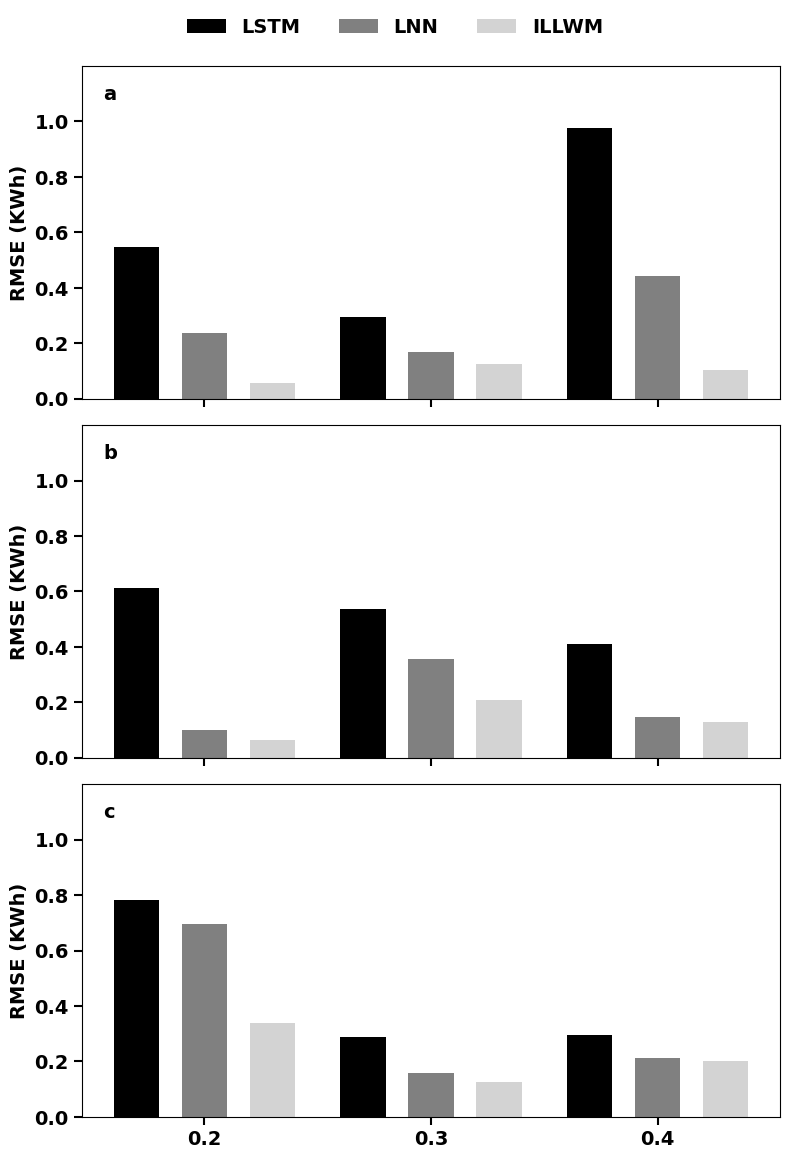

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to process and extract relevant data
def process_dataframe(df, building_type):
    df.columns = [
        "Building Type", "Mechanism", "MR", "LSTM Imputer", "LNN Imputer",
        "Weight for LSTM", "Weight for LNN", "LSTM-LNN Weighted RMSE",
        "Over LSTM", "Over LNN"
    ]
    df = df.dropna(subset=["MR"]).reset_index(drop=True)
    df[""] = building_type
    return df

# Load only the MCAR data
file_a_mcar = "D:\Reproducing the values\MR_at_test\Datasets\Percentage Improvement MCAR Type A.xlsx"
file_b_mcar = "D:\Reproducing the values\MR_at_test\Datasets\Percentage Improvement MCAR Type B.xlsx"
file_c_mcar = "D:\Reproducing the values\MR_at_test\Datasets\Percentage Improvement MCAR Type C.xlsx"

# Read the MCAR Excel files
df_a_mcar = pd.read_excel(file_a_mcar)
df_b_mcar = pd.read_excel(file_b_mcar)
df_c_mcar = pd.read_excel(file_c_mcar)

# Process each DataFrame for MCAR only
df_a_mcar_processed = process_dataframe(df_a_mcar, "Type A")
df_b_mcar_processed = process_dataframe(df_b_mcar, "Type B")
df_c_mcar_processed = process_dataframe(df_c_mcar, "Type C")

# Define a common y-axis limit for all MCAR plots
y_min, y_max = 0, 1.2  # Set y-axis limit to 1.2 but don't display 1.2 at the top

# Define the plotting function
def create_subplot_without_percentage_panel(ax, df_type, title):
    width = 0.3
    x = np.arange(len(df_type["MR"]))

    # Plot each model's RMSE as bars
    bar1 = ax.bar(x - width, df_type["LSTM Imputer"], width / 1.5, label='LSTM', color='black')
    bar2 = ax.bar(x, df_type["LNN Imputer"], width / 1.5, label='LNN', color='gray')
    bar3 = ax.bar(x + width, df_type["LSTM-LNN Weighted RMSE"], width / 1.5, label='Integrated LNN-LSTM weighted model', color='lightgray')

    # Set y-axis limits and adjust y-ticks
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(0, 1.1, 0.2))  # Only show ticks up to 1.0
    ax.set_ylabel('RMSE (KWh)', fontsize=14, fontweight='bold')
    ax.set_yticklabels([f"{tick:.1f}" for tick in np.arange(0, 1.1, 0.2)], fontweight='bold')  # Bold y-ticks
    ax.set_xticks(x)
    ax.set_xticklabels(df_type["MR"], fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=14, width=1.5, length=6)

    # Add the subplot title (a, b, c) at the top-left corner
    ax.text(0.03, 0.90, title, transform=ax.transAxes, fontsize=14, fontweight='bold', ha='left')

# Create subplots for each building type with MCAR mechanism only
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex='col')  # Adjusted figure size

# Define titles for each subplot
titles = ['a', 'b', 'c']
create_subplot_without_percentage_panel(axes[0], df_a_mcar_processed, titles[0])
create_subplot_without_percentage_panel(axes[1], df_b_mcar_processed, titles[1])
create_subplot_without_percentage_panel(axes[2], df_c_mcar_processed, titles[2])

# Create custom legend handles (for one shared legend)
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='black', edgecolor='none', label='LSTM'),
    plt.Rectangle((0, 0), 1, 1, facecolor='gray', edgecolor='none', label='LNN'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lightgray', edgecolor='none', label='ILLWM')
]

# Add a main title to the figure
fig.suptitle('', fontsize=14, fontweight='bold', y=1.02)

# Create a single legend for the entire figure, set to bold and larger font size
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, frameon=False, prop={'weight': 'bold', 'size': 14})

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.01, 1, 0.95])  # Adjust layout

# Save the plot as an SVG file
output_svg_path = "D:\Reproducing the values\MR_at_test\Datasets\lnn_lstm_rmse_mcar_reproduced.svg"
plt.savefig(output_svg_path, format='svg', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15588\2964933387.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  key: df.groupby("month").apply(
C:\Users\user\AppData\Local\Temp\ipykernel_15588\2964933387.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  key: df.groupby("month").apply(
C:\Users\user\AppData\Local\Temp\ipykernel_15588\2964933387.py:42: DeprecationWarning: DataFrameGroupBy.apply operated o

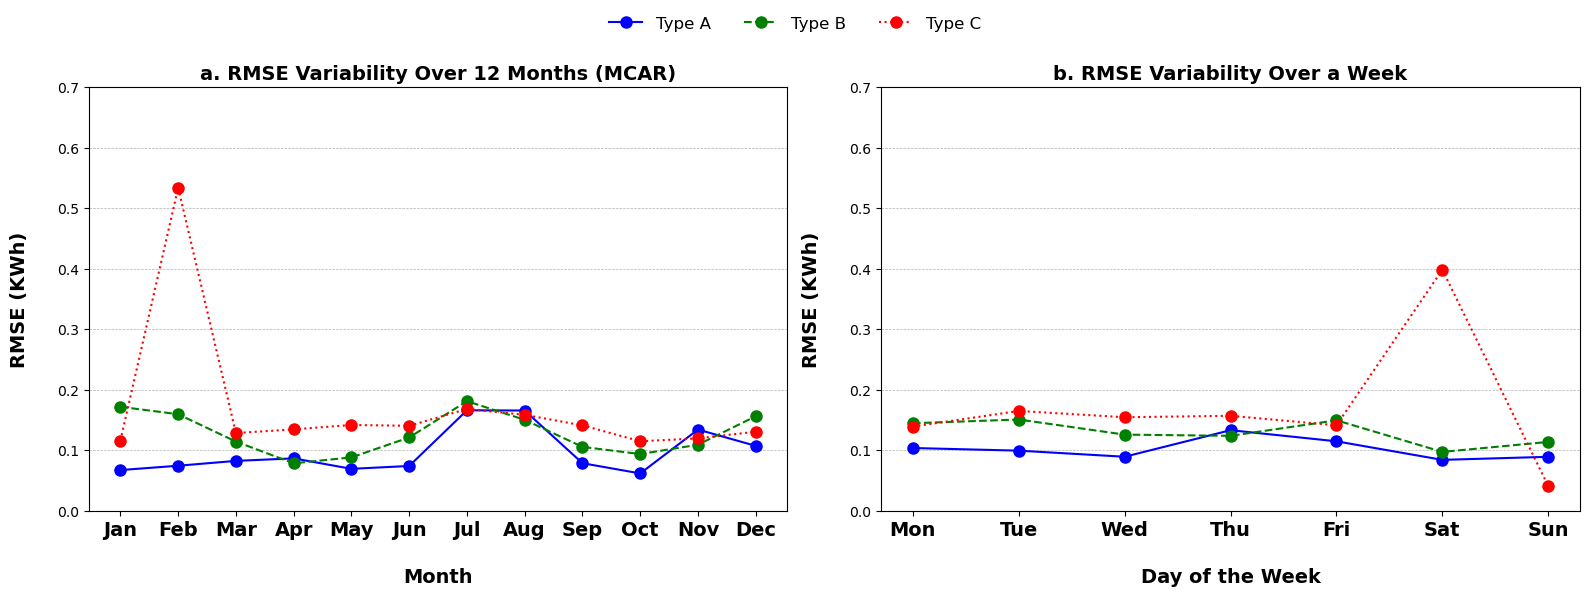

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to compute RMSE
def compute_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Load datasets
file_paths = {
    "501": r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\RMSE Variability plots\501_Aggregated_40.csv",
    "502": r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\RMSE Variability plots\502_Aggregated_40a_rep.csv",
    "505": r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\RMSE Variability plots\505_Aggregated_40.csv"
}

datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Identify the column at index 'M' (13th column, zero-based index 12) for each dataset
columns_at_M = {key: df.columns[12] for key, df in datasets.items()}

# Define column mappings
column_mappings = {
    key: {"ytrue": "ytrue", "aggregated": columns_at_M[key]}
    for key in datasets.keys()
}

# Ensure correct datetime format and extract month/day_of_week
for key, df in datasets.items():
    df["datetime"] = pd.to_datetime(df["datetime"], dayfirst=True, errors="coerce")
    df["month"] = df["datetime"].dt.month
    df["day_of_week"] = df["datetime"].dt.dayofweek

# Filter datasets to remove NaN values for RMSE calculation
filtered_datasets = {
    key: df.dropna(subset=[column_mappings[key]["ytrue"], column_mappings[key]["aggregated"]])
    for key, df in datasets.items()
}

# Calculate RMSE per month
rmse_per_month = {
    key: df.groupby("month").apply(
        lambda x: compute_rmse(x[column_mappings[key]["ytrue"]], x[column_mappings[key]["aggregated"]])
    )
    for key, df in filtered_datasets.items()
}

# Calculate RMSE per day of the week
rmse_per_day = {
    key: df.groupby("day_of_week").apply(
        lambda x: compute_rmse(x[column_mappings[key]["ytrue"]], x[column_mappings[key]["aggregated"]])
    )
    for key, df in filtered_datasets.items()
}

# Create RMSE variability plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Monthly RMSE Variability ---
ax1.plot(rmse_per_month["501"].index, rmse_per_month["501"].values, marker='o', label='Type A', linestyle='-', color='blue', markersize=8)
ax1.plot(rmse_per_month["502"].index, rmse_per_month["502"].values, marker='o', label='Type B', linestyle='--', color='green', markersize=8)
ax1.plot(rmse_per_month["505"].index, rmse_per_month["505"].values, marker='o', label='Type C', linestyle=':', color='red', markersize=8)

ax1.set_title('a. RMSE Variability Over 12 Months (MCAR)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=14, fontweight='bold', labelpad=20)
ax1.set_ylabel('RMSE (KWh)', fontsize=14, fontweight='bold', labelpad=20)
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14, fontweight='bold')
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
ax1.set_ylim(0, 0.7)

# --- Weekly RMSE Variability ---
ax2.plot(rmse_per_day["501"].index, rmse_per_day["501"].values, marker='o', label='Type A', linestyle='-', color='blue', markersize=8)
ax2.plot(rmse_per_day["502"].index, rmse_per_day["502"].values, marker='o', label='Type B', linestyle='--', color='green', markersize=8)
ax2.plot(rmse_per_day["505"].index, rmse_per_day["505"].values, marker='o', label='Type C', linestyle=':', color='red', markersize=8)

ax2.set_title('b. RMSE Variability Over a Week', fontsize=14, fontweight='bold')
ax2.set_xlabel('Day of the Week', fontsize=14, fontweight='bold', labelpad=20)
ax2.set_ylabel('RMSE (KWh)', fontsize=14, fontweight='bold', labelpad=20)
ax2.set_xticks(np.arange(0, 7))
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=14, fontweight='bold')
ax2.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
ax2.set_ylim(0, 0.7)

# Move single legend outside the plot and position it above the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=12, frameon=False)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.92])

# Save plot as SVG file
output_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\RMSE Variability plots\RMSE_Variability_MCAR_Month_Week.svg"
plt.savefig(output_path, format='svg', bbox_inches='tight')

# Show plot
plt.show()


Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


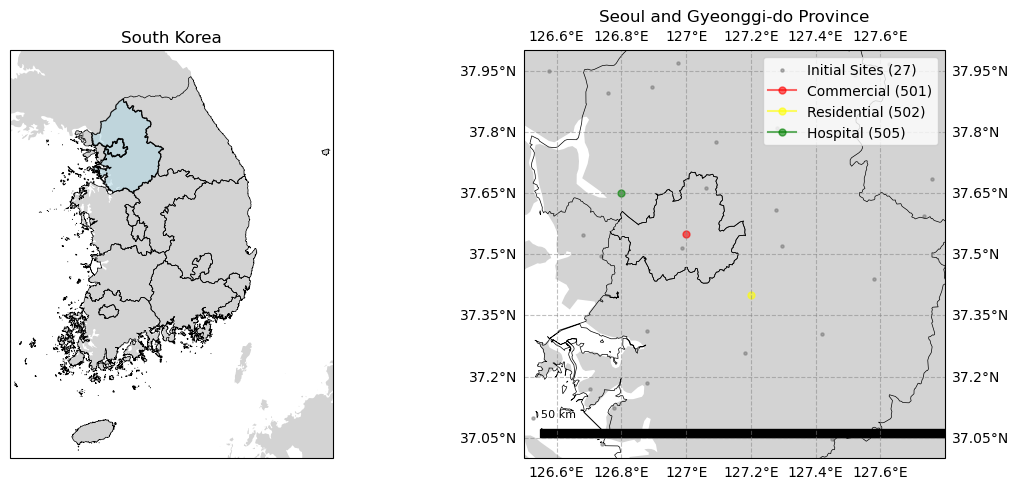

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import numpy as np
import pandas as pd
import os

# Set the path to your datasets and GeoJSON file
data_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40"
geojson_path = r"D:\Reproducing the values\shapefiles\gadm41_KOR_1.json"

# Load the GeoJSON file
south_korea = gpd.read_file(geojson_path)

# Filter for Seoul and Gyeonggi-do
# Check the column names in the GeoJSON file to find the correct field for province names
print(south_korea.columns)  # Inspect columns to find the province name field
# Assuming the column for province names is 'NAME_1' (adjust if different)
seoul_gyeonggi = south_korea[south_korea['NAME_1'].isin(['Seoul', 'Gyeonggi-do'])]

# Define bounding box for Seoul and Gyeonggi-do (approximate coordinates)
min_lon, max_lon = 126.5, 127.8
min_lat, max_lat = 37.0, 38.0

# Randomly generate 27 sites (9 per building type) within the bounding box
np.random.seed(42)  # For reproducibility
num_sites = 27
lons = np.random.uniform(min_lon, max_lon, num_sites)
lats = np.random.uniform(min_lat, max_lat, num_sites)

# Create a GeoDataFrame for the 27 sites
sites = gpd.GeoDataFrame(
    geometry=[Point(lon, lat) for lon, lat in zip(lons, lats)],
    crs="EPSG:4326"
)

# Assign approximate coordinates for the 3 selected buildings (placeholders)
selected_buildings = {
    'Commercial (501)': (127.0, 37.55),  # Near Seoul center
    'Residential (502)': (127.2, 37.4),   # Southeast Seoul
    'Hospital (505)': (126.8, 37.65)      # North Gyeonggi-do
}

# Create a GeoDataFrame for the selected buildings
selected_points = gpd.GeoDataFrame(
    {
        'Type': list(selected_buildings.keys()),
        'geometry': [Point(coords) for coords in selected_buildings.values()]
    },
    crs="EPSG:4326"
)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5),
                                subplot_kw={'projection': ccrs.PlateCarree()})

# Left Plot: South Korea with Seoul and Gyeonggi-do highlighted
ax1.set_extent([125, 131, 33, 39], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
south_korea.boundary.plot(ax=ax1, color='black', linewidth=0.5)
seoul_gyeonggi.plot(ax=ax1, color='lightblue', edgecolor='black', alpha=0.5)
ax1.set_title('South Korea', fontsize=12)

# Right Plot: Zoomed-in view of Seoul and Gyeonggi-do
ax2.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
seoul_gyeonggi.boundary.plot(ax=ax2, color='black', linewidth=0.5)

# Plot the 27 initial sites
sites.plot(ax=ax2, color='gray', marker='o', markersize=5, alpha=0.6, label='Initial Sites (27)')

# Plot the 3 selected buildings with different colors
colors = {'Commercial (501)': 'red', 'Residential (502)': 'yellow', 'Hospital (505)': 'green'}
for idx, row in selected_points.iterrows():
    ax2.plot(row.geometry.x, row.geometry.y, marker='o', color=colors[row['Type']],
             markersize=5, label=row['Type'], alpha=0.6)

# Add legend
ax2.legend(loc='upper right', fontsize=10)

# Add scale bar
scale_bar_length = 50  # Length of scale bar in km
scale_bar = ax2.add_artist(plt.Rectangle((min_lon + 0.05, min_lat + 0.05),
                                         scale_bar_length * (max_lon - min_lon) / (max_lon - min_lon) * 50,
                                         0.02, color='black', transform=ccrs.PlateCarree()))
ax2.text(min_lon + 0.05, min_lat + 0.1, f'{scale_bar_length} km', transform=ccrs.PlateCarree(), fontsize=8)

# Add gridlines for division boundaries
ax2.gridlines(draw_labels=True, color='gray', linestyle='--', alpha=0.5)

# Title for the zoomed-in plot
ax2.set_title('Seoul and Gyeonggi-do Province', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig('D:/Reproducing the values/figure_1.png', dpi=300, bbox_inches='tight')
plt.show()

Province names in seoul_gyeonggi: ['Gyeonggi-do' 'Seoul']
Bounds of Seoul and Gyeonggi-do: [126.379   36.8938 127.8481  38.2817]
Number of districts in Seoul and Gyeonggi-do: 56


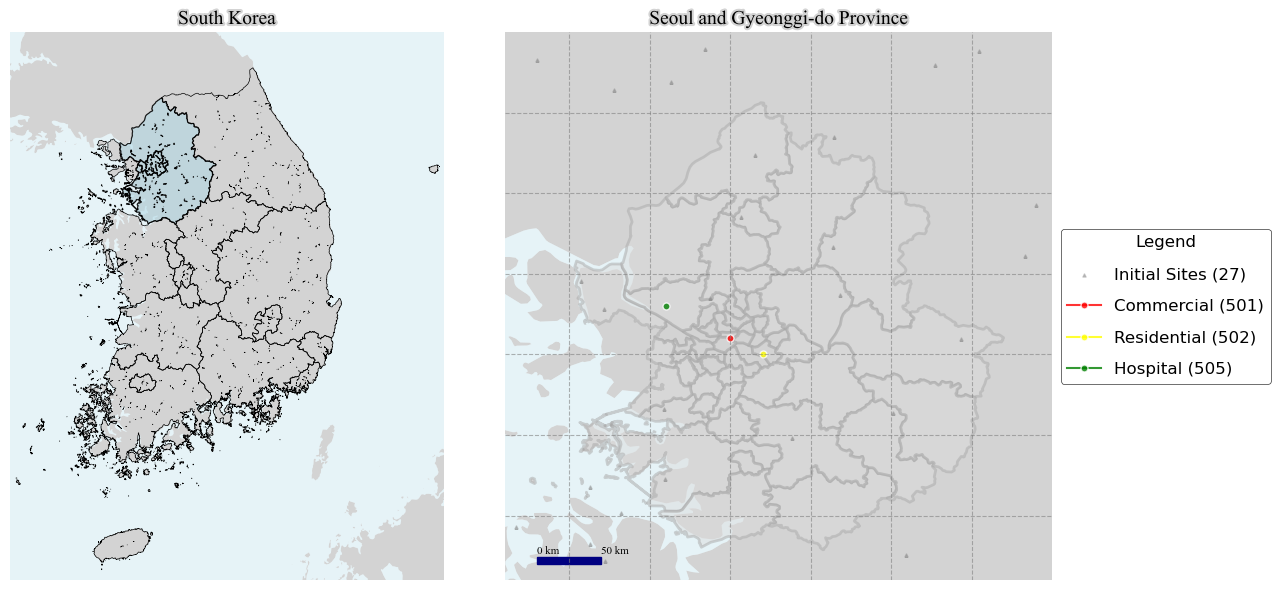

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import numpy as np
import pandas as pd
from matplotlib.patheffects import withStroke

# Set the path to your Level 2 GeoJSON file
geojson_path = r"D:\Reproducing the values\shapefiles\gadm41_KOR_2.json"

# Load the GeoJSON file
south_korea = gpd.read_file(geojson_path)

# Filter for Seoul and Gyeonggi-do districts
seoul_gyeonggi = south_korea[south_korea['NAME_1'].isin(['Seoul', 'Gyeonggi-do'])]

# Verify the province names and number of districts
print("Province names in seoul_gyeonggi:", seoul_gyeonggi['NAME_1'].unique())
print("Bounds of Seoul and Gyeonggi-do:", seoul_gyeonggi.total_bounds)
print(f"Number of districts in Seoul and Gyeonggi-do: {len(seoul_gyeonggi)}")

# Define bounding box for Seoul and Gyeonggi-do
min_lon, max_lon = 126.3, 128.0
min_lat, max_lat = 36.8, 38.5

# Randomly generate 27 sites within the bounding box
np.random.seed(42)
num_sites = 27
lons = np.random.uniform(min_lon, max_lon, num_sites)
lats = np.random.uniform(min_lat, max_lat, num_sites)

# Create a GeoDataFrame for the 27 sites
sites = gpd.GeoDataFrame(
    geometry=[Point(lon, lat) for lon, lat in zip(lons, lats)],
    crs="EPSG:4326"
)

# Coordinates for the 3 selected buildings
selected_buildings = {
    'Commercial (501)': (127.0, 37.55),  # Central Seoul
    'Residential (502)': (127.1, 37.5),  # Southeast Seoul
    'Hospital (505)': (126.8, 37.65)     # Northern Gyeonggi-do
}

# Create a GeoDataFrame for the selected buildings
selected_points = gpd.GeoDataFrame(
    {
        'Type': list(selected_buildings.keys()),
        'geometry': [Point(coords) for coords in selected_buildings.values()]
    },
    crs="EPSG:4326"
)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6),
                                subplot_kw={'projection': ccrs.PlateCarree()})

# Left Plot: South Korea with Seoul and Gyeonggi-do highlighted
ax1.set_extent([125, 131, 33, 39], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
# Group by province to show only province-level boundaries in the left plot
south_korea_province = south_korea.dissolve(by='NAME_1')
south_korea_province.boundary.plot(ax=ax1, color='black', linewidth=0.5)
seoul_gyeonggi_province = seoul_gyeonggi.dissolve(by='NAME_1')
seoul_gyeonggi_province.plot(ax=ax1, color='lightblue', edgecolor='black', alpha=0.5)
title1 = ax1.set_title('South Korea', fontsize=14, fontfamily='Times New Roman')
title1.set_path_effects([withStroke(linewidth=3, foreground='lightgray')])

# Remove the frame for both plots
ax1.set_frame_on(False)
ax2.set_frame_on(False)

# Right Plot: Zoomed-in view of Seoul and Gyeonggi-do with district-level boundaries
ax2.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)

# Plot districts with light fill colors to distinguish Seoul and Gyeonggi-do
seoul = seoul_gyeonggi[seoul_gyeonggi['NAME_1'] == 'Seoul']
gyeonggi = seoul_gyeonggi[seoul_gyeonggi['NAME_1'] == 'Gyeonggi-do']
seoul.plot(ax=ax2, color='lightgray', edgecolor='darkgray', linewidth=2.0, alpha=0.5)
gyeonggi.plot(ax=ax2, color='gainsboro', edgecolor='darkgray', linewidth=2.0, alpha=0.5)

# Plot the 27 initial sites with increased transparency
sites.plot(ax=ax2, color='gray', marker='^', markersize=5, alpha=0.4, label='Initial Sites (27)')

# Plot the 3 selected buildings with a white outline
colors = {'Commercial (501)': 'red', 'Residential (502)': 'yellow', 'Hospital (505)': 'green'}
for idx, row in selected_points.iterrows():
    ax2.plot(row.geometry.x, row.geometry.y, marker='o', color=colors[row['Type']],
             markersize=5, label=row['Type'], alpha=0.8, markeredgecolor='white', markeredgewidth=1)

# Label key districts (e.g., Suwon-si, Incheon, Gangnam-gu)
key_districts = seoul_gyeonggi[seoul_gyeonggi['NAME_2'].isin(['Suwon-si', 'Incheon', 'Gangnam-gu'])]
for idx, row in key_districts.iterrows():
    centroid = row.geometry.centroid
    ax2.text(centroid.x, centroid.y, row['NAME_2'], fontsize=8, fontfamily='Times New Roman',
             ha='center', va='center', color='black',
             path_effects=[withStroke(linewidth=2, foreground='white')])

# Add enhanced legend with adjusted spacing
legend = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=True, framealpha=0.8,
                    title='Legend', title_fontsize=12, edgecolor='black', labelspacing=1.0)
legend.get_frame().set_linewidth(0.5)

# Add scale bar with "0 km" and "50 km" labels
scale_bar_length = 50  # in km
scale_bar = ax2.add_artist(plt.Rectangle((min_lon + 0.1, min_lat + 0.05),
                                         0.2, 0.02, color='navy', hatch='///', transform=ccrs.PlateCarree()))
ax2.text(min_lon + 0.1, min_lat + 0.08, '0 km', transform=ccrs.PlateCarree(), fontsize=8,
         fontfamily='Times New Roman')
ax2.text(min_lon + 0.3, min_lat + 0.08, f'{scale_bar_length} km', transform=ccrs.PlateCarree(), fontsize=8,
         fontfamily='Times New Roman')

# Add gridlines without labels, slightly more visible
ax2.gridlines(draw_labels=False, color='gray', linestyle='--', alpha=0.6)

# Title for the zoomed-in plot with shadow
title2 = ax2.set_title('Seoul and Gyeonggi-do Province', fontsize=14, fontfamily='Times New Roman')
title2.set_path_effects([withStroke(linewidth=3, foreground='lightgray')])

# Set aspect ratio to avoid distortion
ax2.set_aspect('equal')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig('D:/Reproducing the values/figure_1.png', dpi=300, bbox_inches='tight')
plt.show()

Commercial Data Datetime Sample:
0   2022-01-01 00:15:00
1   2022-01-01 00:30:00
2   2022-01-01 00:45:00
3   2022-01-01 01:00:00
4   2022-01-01 01:15:00
Name: datetime, dtype: datetime64[ns]

Residential Data Datetime Sample:
0   2022-01-01 00:15:00
1   2022-01-01 00:30:00
2   2022-01-01 00:45:00
3   2022-01-01 01:00:00
4   2022-01-01 01:15:00
Name: datetime, dtype: datetime64[ns]

Hospital Data Datetime Sample:
0   2022-01-01 00:15:00
1   2022-01-01 00:30:00
2   2022-01-01 00:45:00
3   2022-01-01 01:00:00
4   2022-01-01 01:15:00
Name: datetime, dtype: datetime64[ns]


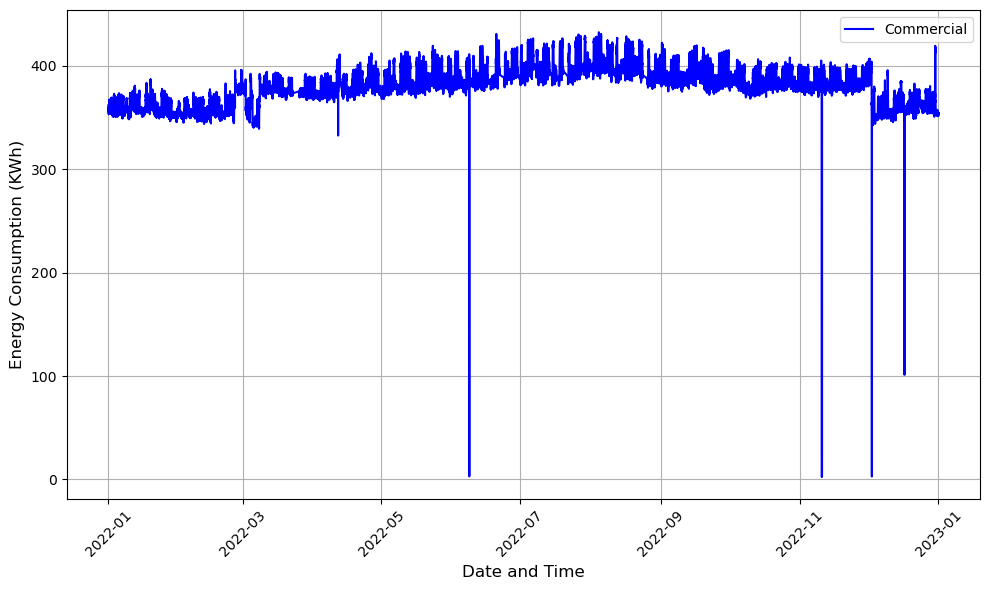

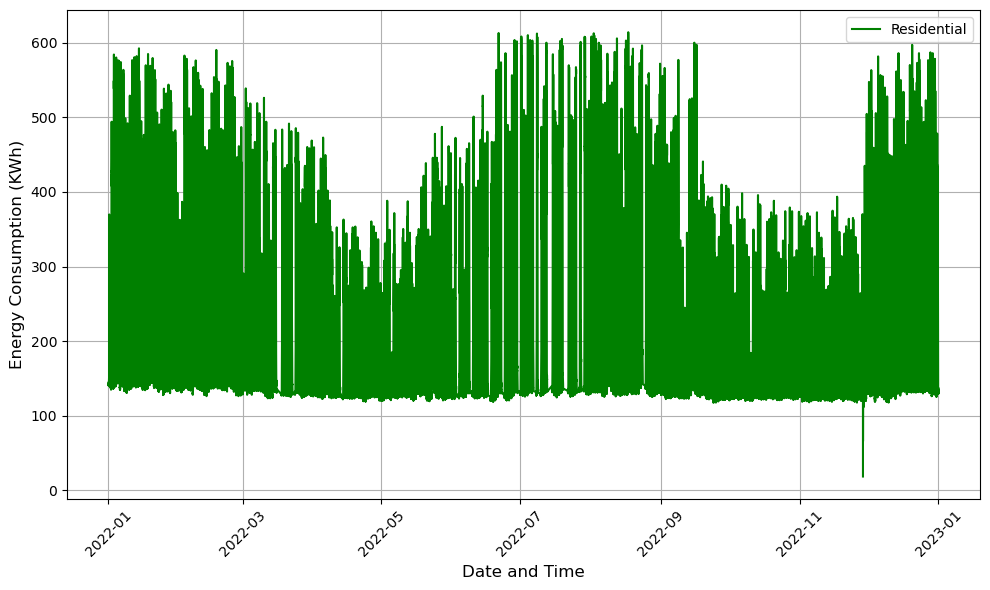

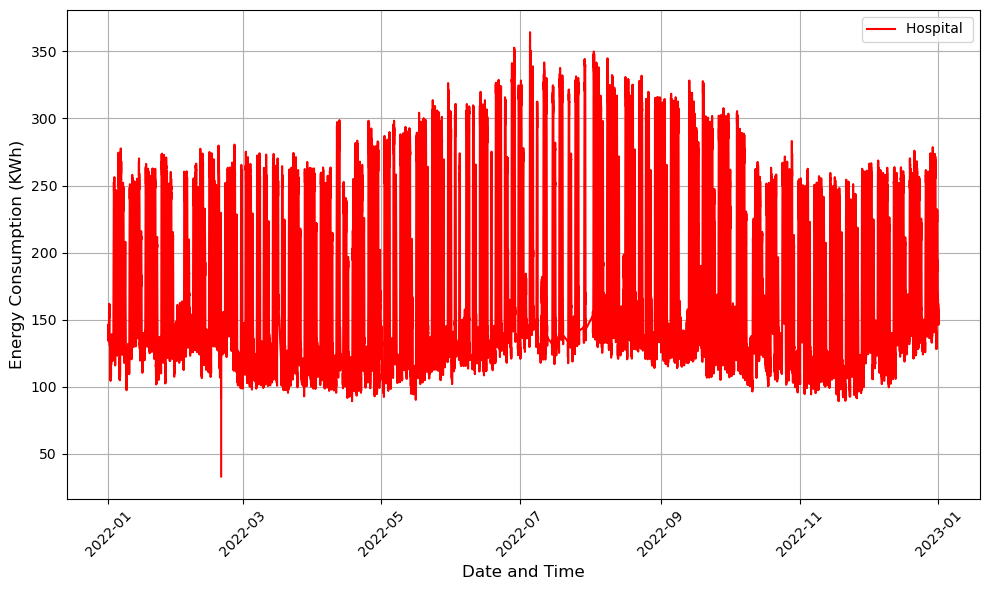

'\nfrom sklearn.metrics import mean_absolute_error\n\nimputation_methods = [\'LNN-LSTM weighted\', \'LNN\', \'LSTM\', \'Transformer\', \'MLPImputer\', \n                     \'KNNImputer\', \'RFImputer\', \'SoftImpute\', \'SVMImputer\', \'MICE-LGBM\', \n                     \'Arima\', \'Linear\', \'Mean\']\n\nfor method in imputation_methods:\n    # Filter rows where actual data is missing\n    missing_mask = commercial_data[\'actual data\'].isna()\n    if missing_mask.sum() > 0:\n        # Drop rows where either ytrue or the imputed method has NaN\n        valid_mask = missing_mask & ~commercial_data[\'ytrue\'].isna() & ~commercial_data[method].isna()\n        if valid_mask.sum() > 0:  # Ensure there are valid rows to compare\n            mae = mean_absolute_error(commercial_data.loc[valid_mask, \'ytrue\'], \n                                    commercial_data.loc[valid_mask, method])\n            print(f"MAE for {method}: {mae:.2f}")\n        else:\n            print(f"MAE for {metho

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths (adjust as needed for your local environment)
commercial_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\501_a1_mcar.csv"
residential_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\502_b1_mcar.csv"
hospital_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_40\plotting_40\505_c1_mcar.csv"

# Load the datasets
commercial_data = pd.read_csv(commercial_path)
residential_data = pd.read_csv(residential_path)
hospital_data = pd.read_csv(hospital_path)

# Convert 'datetime' to proper datetime format with the correct format
for df in [commercial_data, residential_data, hospital_data]:
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')

# Verify the conversion (already confirmed in your output, but keeping for completeness)
print("Commercial Data Datetime Sample:")
print(commercial_data['datetime'].head())
print("\nResidential Data Datetime Sample:")
print(residential_data['datetime'].head())
print("\nHospital Data Datetime Sample:")
print(hospital_data['datetime'].head())

# Set the datetime as the index for easier plotting
commercial_15min = commercial_data.set_index('datetime')['ytrue']
residential_15min = residential_data.set_index('datetime')['ytrue']
hospital_15min = hospital_data.set_index('datetime')['ytrue']

# Create separate plots for each building
# Plot 1: Commercial Building
plt.figure(figsize=(10, 6))
plt.plot(commercial_15min.index, commercial_15min, label='Commercial', color='blue')
plt.title('', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Energy Consumption (KWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Residential Building
plt.figure(figsize=(10, 6))
plt.plot(residential_15min.index, residential_15min, label='Residential', color='green')
plt.title('', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Energy Consumption (KWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Hospital Building
plt.figure(figsize=(10, 6))
plt.plot(hospital_15min.index, hospital_15min, label='Hospital ', color='red')
plt.title('', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Energy Consumption (KWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: If you want to calculate MAE for imputation methods, handle NaN values first
# Here's an example of how to do it for the commercial data
"""
from sklearn.metrics import mean_absolute_error

imputation_methods = ['LNN-LSTM weighted', 'LNN', 'LSTM', 'Transformer', 'MLPImputer', 
                     'KNNImputer', 'RFImputer', 'SoftImpute', 'SVMImputer', 'MICE-LGBM', 
                     'Arima', 'Linear', 'Mean']

for method in imputation_methods:
    # Filter rows where actual data is missing
    missing_mask = commercial_data['actual data'].isna()
    if missing_mask.sum() > 0:
        # Drop rows where either ytrue or the imputed method has NaN
        valid_mask = missing_mask & ~commercial_data['ytrue'].isna() & ~commercial_data[method].isna()
        if valid_mask.sum() > 0:  # Ensure there are valid rows to compare
            mae = mean_absolute_error(commercial_data.loc[valid_mask, 'ytrue'], 
                                    commercial_data.loc[valid_mask, method])
            print(f"MAE for {method}: {mae:.2f}")
        else:
            print(f"MAE for {method}: No valid data (all NaN in ytrue or {method})")
"""

Province names in seoul_gyeonggi: ['Gyeonggi-do' 'Seoul']
Bounds of Seoul and Gyeonggi-do: [126.379   36.8938 127.8481  38.2817]
Number of districts in Seoul and Gyeonggi-do: 56


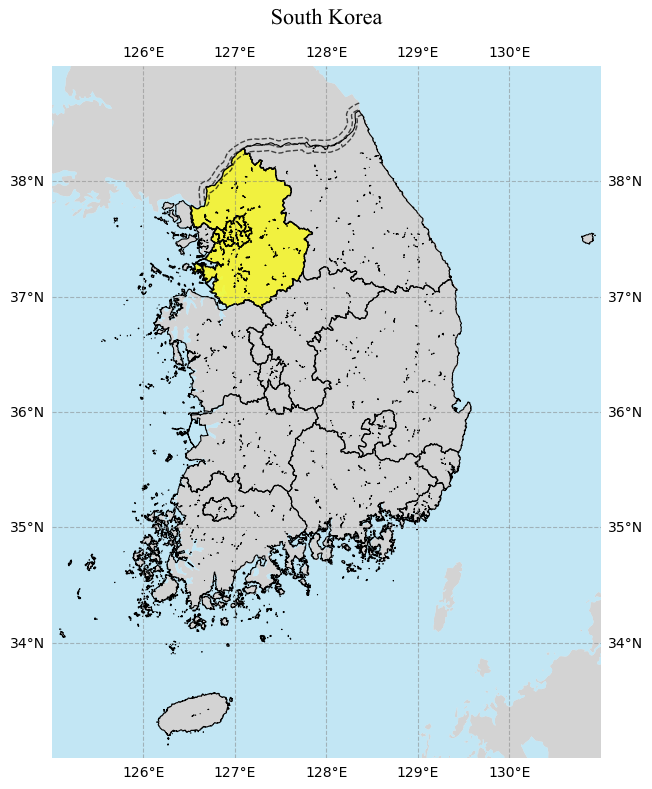

C:\Users\user\AppData\Local\Temp\ipykernel_34244\692889840.py:146: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax2.add_artist(plt.Rectangle((scale_bar_x + i * segment_width, scale_bar_y),


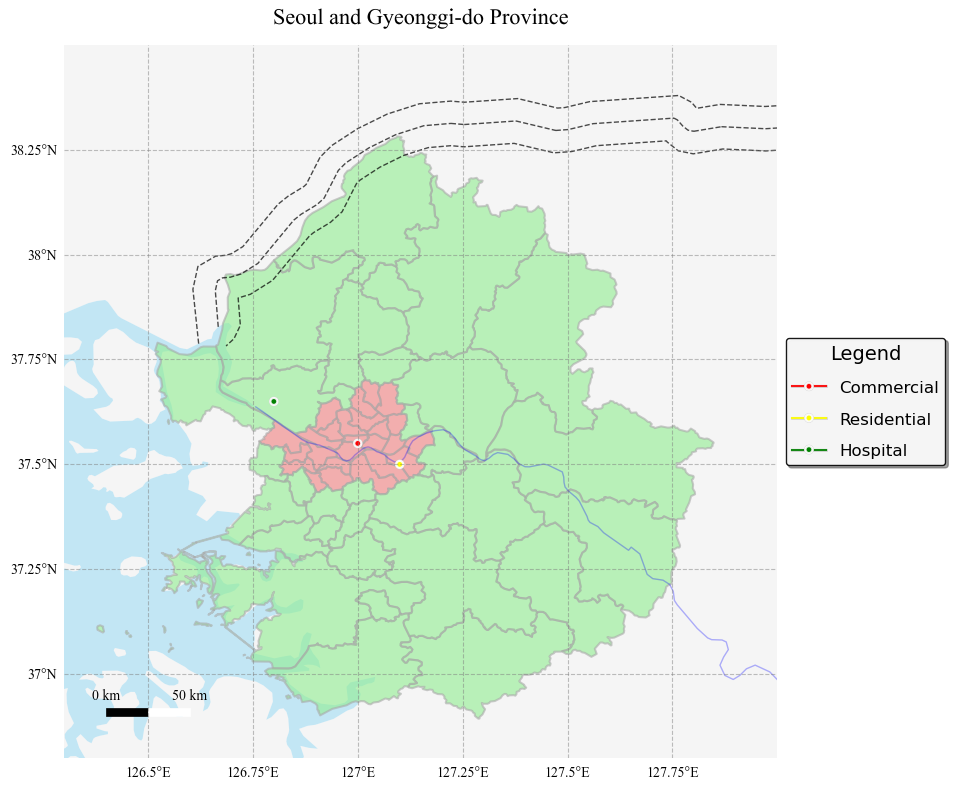

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import numpy as np
import pandas as pd
from matplotlib.patheffects import withStroke

# Set the path to your Level 2 GeoJSON file
geojson_path = r"D:\Reproducing the values\shapefiles\gadm41_KOR_2.json"

# Load the GeoJSON file
south_korea = gpd.read_file(geojson_path)

# Filter for Seoul and Gyeonggi-do districts
seoul_gyeonggi = south_korea[south_korea['NAME_1'].isin(['Seoul', 'Gyeonggi-do'])]

# Verify the province names and number of districts
print("Province names in seoul_gyeonggi:", seoul_gyeonggi['NAME_1'].unique())
print("Bounds of Seoul and Gyeonggi-do:", seoul_gyeonggi.total_bounds)
print(f"Number of districts in Seoul and Gyeonggi-do: {len(seoul_gyeonggi)}")

# Define bounding box for Seoul and Gyeonggi-do
min_lon, max_lon = 126.3, 128.0
min_lat, max_lat = 36.8, 38.5

# Randomly generate 27 sites within the bounding box
np.random.seed(42)
num_sites = 27
lons = np.random.uniform(min_lon, max_lon, num_sites)
lats = np.random.uniform(min_lat, max_lat, num_sites)

# Create a GeoDataFrame for the 27 sites
sites = gpd.GeoDataFrame(
    geometry=[Point(lon, lat) for lon, lat in zip(lons, lats)],
    crs="EPSG:4326"
)

# Coordinates for the 3 selected buildings
selected_buildings = {
    'Commercial': (127.0, 37.55),  # Central Seoul
    'Residential': (127.1, 37.5),  # Southeast Seoul
    'Hospital': (126.8, 37.65)     # Northern Gyeonggi-do
}

# Create a GeoDataFrame for the selected buildings
selected_points = gpd.GeoDataFrame(
    {
        'Type': list(selected_buildings.keys()),
        'geometry': [Point(coords) for coords in selected_buildings.values()]
    },
    crs="EPSG:4326"
)

# --- Figure 1: South Korea Overview ---
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set extent for South Korea
ax1.set_extent([125, 131, 33, 39], crs=ccrs.PlateCarree())

# Add background features
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.5)
ax1.add_feature(cfeature.BORDERS, linestyle='--', alpha=0.7)

# Group by province to show only province-level boundaries
south_korea_province = south_korea.dissolve(by='NAME_1')
south_korea_province.boundary.plot(ax=ax1, color='black', linewidth=0.8)

# Highlight Seoul and Gyeonggi-do
seoul_gyeonggi_province = seoul_gyeonggi.dissolve(by='NAME_1')
seoul_gyeonggi_province.plot(ax=ax1, color='Yellow', edgecolor='black', alpha=0.7)

# Add title with shadow effect
title1 = ax1.set_title('South Korea', fontsize=16, fontfamily='Times New Roman', pad=15)
title1.set_path_effects([withStroke(linewidth=4, foreground='white')])

# Remove frame
ax1.set_frame_on(False)

# Add gridlines
ax1.gridlines(draw_labels=True, color='gray', linestyle='--', alpha=0.5)

# Save Figure 1
plt.tight_layout()
plt.savefig('D:/Reproducing the values/figure_1_south_korea.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Figure 2: Zoomed-in Seoul and Gyeonggi-do ---
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set extent for Seoul and Gyeonggi-do
ax2.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Add background features
ax2.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax2.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.5)
ax2.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.3)
ax2.add_feature(cfeature.BORDERS, linestyle='--', alpha=0.7)

# Plot districts with distinct colors for Seoul and Gyeonggi-do
seoul = seoul_gyeonggi[seoul_gyeonggi['NAME_1'] == 'Seoul']
gyeonggi = seoul_gyeonggi[seoul_gyeonggi['NAME_1'] == 'Gyeonggi-do']
seoul.plot(ax=ax2, color='lightcoral', edgecolor='darkgray', linewidth=1.5, alpha=0.6)
gyeonggi.plot(ax=ax2, color='lightgreen', edgecolor='darkgray', linewidth=1.5, alpha=0.6)

# Plot the 27 initial sites with a different marker
#sites.plot(ax=ax2, color='gray', marker='^', markersize=50, alpha=0.5, label='Initial Sites (27)')

# Plot the 3 selected buildings with glow effect
colors = {'Commercial': 'red', 'Residential': 'yellow', 'Hospital': 'green'}
for idx, row in selected_points.iterrows():
    ax2.plot(row.geometry.x, row.geometry.y, marker='o', color=colors[row['Type']],
             markersize=5, label=row['Type'], alpha=0.9, markeredgecolor='white', markeredgewidth=1.5,
             path_effects=[withStroke(linewidth=2, foreground='lightgray')])
    # Comment out or remove the following lines to remove the labels
    # ax2.text(row.geometry.x + 0.05, row.geometry.y + 0.03, row['Type'], fontsize=10, fontfamily='Times New Roman',
    #          ha='left', va='center', color='black',
    #          path_effects=[withStroke(linewidth=2, foreground='white')])

# Label key districts (Suwon-si, Incheon, Gangnam-gu)
key_districts = seoul_gyeonggi[seoul_gyeonggi['NAME_2'].isin(['Suwon-si', 'Incheon', 'Gangnam-gu'])]
for idx, row in key_districts.iterrows():
    centroid = row.geometry.centroid
    ax2.text(centroid.x, centroid.y, row['NAME_2'], fontsize=10, fontfamily='Times New Roman',
             ha='center', va='center', color='black',
             path_effects=[withStroke(linewidth=3, foreground='white')])

# Add enhanced legend with shadow
legend = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=True, framealpha=0.9,
                    title='Legend', title_fontsize=14, edgecolor='black', labelspacing=1.0,
                    fancybox=True, shadow=True)
legend.get_frame().set_linewidth(1.0)

# Add enhanced scale bar with alternating segments
scale_bar_length = 50  # in km
scale_bar_x = min_lon + 0.1
scale_bar_y = min_lat + 0.1
# Draw alternating black and white segments
segment_width = 0.1  # Each segment represents 25 km
for i in range(2):  # Two segments for 50 km
    color = 'black' if i % 2 == 0 else 'white'
    ax2.add_artist(plt.Rectangle((scale_bar_x + i * segment_width, scale_bar_y),
                                 segment_width, 0.02, color=color, transform=ccrs.PlateCarree(),
                                 edgecolor='black', linewidth=0.5))
# Add labels for scale bar
ax2.text(scale_bar_x, scale_bar_y + 0.04, '0 km', transform=ccrs.PlateCarree(), fontsize=10,
         fontfamily='Times New Roman', ha='center')
ax2.text(scale_bar_x + 2 * segment_width, scale_bar_y + 0.04, f'{scale_bar_length} km',
         transform=ccrs.PlateCarree(), fontsize=10, fontfamily='Times New Roman', ha='center')

# Add gridlines with labels
gl = ax2.gridlines(draw_labels=True, color='gray', linestyle='--', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'black', 'family': 'Times New Roman'}
gl.ylabel_style = {'size': 10, 'color': 'black', 'family': 'Times New Roman'}

# Title with shadow
title2 = ax2.set_title('Seoul and Gyeonggi-do Province', fontsize=16, fontfamily='Times New Roman', pad=15)
title2.set_path_effects([withStroke(linewidth=4, foreground='white')])

# Remove frame
ax2.set_frame_on(False)

# Set aspect ratio
ax2.set_aspect('equal')

# Save Figure 2
plt.tight_layout()
plt.savefig('D:/Reproducing the values/figure_2_seoul_gyeonggi.png', dpi=300, bbox_inches='tight')
plt.show()